In [56]:
#%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from numba import njit
from scipy import special
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [57]:
def plotCommands(xlabel, ylabel, title, xscale = False, yscale = False, legend = False, printString = ""):
    #Function containing the usual commands when plotting with matplotlib.pyplot
    #If log-scaled x- and/or y-axis is needed, set xscale and/or yscale to True
    #If the figure has a label, set legend = True
    #If extra information is needed, use printString
    plt.xlabel(xlabel, size = 20)
    plt.ylabel(ylabel, size = 20)
    plt.title(title, size = 27)
    if xscale:
        plt.xscale('log')
    if yscale:
        plt.yscale('log')
    if legend:
        plt.legend()
    plt.grid()
    if printString:
        print(printString)
    plt.show()
    return None

In [58]:
plt.rcParams["figure.figsize"] = (16, 10) #Increase figure size

### TMA4215 Numerisk Matematikk 

Høst 2021 – Tuesday, October 19, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Project 2: Bézier Curves and Interpolation

### Notes

**Groups.** This project is a group project and can be solved in groups of _up to three_ students. Feel free to use for example the Forum to find each other. Eventually it will be possible to register groups in Inspera. One persion (per group) can create a group and will get a PIN code which can be used by the other group members for registering.

**Requirements for submission.** The submission is in [Inspera](https://ntnu.inspera.no/). Each group must submit their onw report. It is not allowed to copy from other groups.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

It is not possible to have an extension for this project.

**Supervision.** For questions the usual time, Thursday, 18.15–20.00 can be used. Questions can also be asked in the Mattelab forum.

### Submission Deadline
Tuesday, November 9, 2021.

## Introduction

In this project we consider another possibility to perform interpolation with piecewise polynomials, namely from the family of parametrized curves.

Let $\mathbf p_0,\ldots, \mathbf p_n\in \mathbb R^d$ (usually $d=2$ or $d=3$) denote $n+1$ ordered points.

Then the $n$ th degree Bézier curve is defined by

$$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i,
$$

where $B_{n,i}(t)$ are the $n$ th degree _Bernstein polynomials_. We use the first notation, $\mathbf c(t)$ when the points are clear from context, and the second, $\mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ to emphasize the dependency of the nodes and/or the degree $n$.

$$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}, \qquad i=0,\ldots,n,
$$

where ${n \choose i} = \frac{n!}{i!(n-i)!}$ denotes the binomial coefficient.

To get familiar with the first few Bernstein polynomials it might be good to write down $B_{0,0}, B_{0,1}, B_{1,1}, B_{0,2}, B_{1,2},$ and $B_{2,2}.$ 

## Problem 1: Properties of Bernstein polynomials

Let $n\in \mathbb N$ be given. We consider the Bernstein polynomials $B_{i,n}(t)$, $i=0,\ldots,n$.

1. Show that $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$.

_________
### Solution 1.1
We start by evaluating each part of 
$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}.
$

We know that $n\geq 0$ and $0\leq i\leq n$, which gives us that $(n-i)\geq 0$. Using this, we get both $n!>0$ and $(n-i)!>0$ such that ${n \choose i}\geq 0$. 

Since $t\in [0,1]$ and $i\geq 0$, we get that $t^i\geq 0$.

From $t\in [0,1]$ we also have that $(1-t)\in [0,1]$. Using this and that $(n-i)\geq 0$, we get that $(1-t)^{n-i}\geq 0$.

Since every part of $B_{i,n}(t)$ is greater than, or equal zero for all $t\in [0,1]$, we have that $B_{i,n}(t)\geq 0$ for all $t\in [0,1]$.
_________

2. Show that the Bernstein polynomials for $0<i<n$ can be recursively defined by
  
   $$
   B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t), \qquad t \in [0,1].
   $$
  
   How does this look like for $B_{0,n}$ and $B_{n,n}$? 
_______

### Solution 1.2
We start by looking at $B_{i-1,n-1}(t)$ and $B_{i,n-1}(t)$.
$$\begin{align}
    B_{i-1,n-1}(t)&={n-1 \choose i-1}\: t^{i-1}(1-t)^{n-i}\\ \\
    B_{i,n-1}(t)&={n-1 \choose i}\:t^i(1-t)^{n-i-1}
\end{align}$$

Then we want to show that $(1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)={n \choose i}t^i(1-t)^{n-i}=B_{i,n}(t)$.

$$\begin{align}
(1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t) &= (1-t){n-1 \choose i}t^i(1-t)^{n-i-1}+t{n-1 \choose i-1}t^{i-1}(1-t)^{n-i}\\
&={n-1 \choose i}t^i(1-t)^{n-i}+{n-1 \choose i-1}t^{i}(1-t)^{n-i}\\
&=\left({n-1 \choose i}+{n-1 \choose i-1}\right)t^{i}(1-t)^{n-i}\\
&=\left(\frac{(n-1)!}{i!(n-1-i)!}+\frac{(n-1)!}{(i-1)!(n-i)!}\right)t^{i}(1-t)^{n-i}
\end{align}$$

What we want to show is that this is equal to 
$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}
$, and to do this all we have left are to show that $\frac{(n-1)!}{i!(n-1-i)!}+\frac{(n-1)!}{(i-1)!(n-i)!}= {n \choose i}$. 

$$\begin{align}
\frac{(n-1)!}{i!(n-1-i)!}+\frac{(n-1)!}{(i-1)!(n-i)!}&=\frac{(n-1)!}{i!(n-i)!}\Bigl((n-i)+i\Bigr)\\
&=\frac{n (n-1)!}{i!(n-i)!}\\
&=\frac{n!}{i!(n-i)!}\\
&={n \choose i}
\end{align}$$

Then we have that shown that
$$
    (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t) ={n \choose i}t^{i}(1-t)^{n-i}=B_{i,n}(t).
    $$

_____

Using this recursively definition for $B_{0,n}$ and $B_{n,n}$ we get that 

$$B_{0,n}(t)=(1-t)B_{0,n-1}(t)+tB_{-1,n-1}(t)$$

$$B_{n,n}(t)=(1-t)B_{n,n-1}(t)+tB_{n-1,n-1}(t)$$

 
The Bernstein polynominals is defined such that it equal zero when $i<0$ or $n<i$. This is the case for $B_{-1,n-1}(t)$ and $B_{n,n-1}(t).$

Using the recursive definition we get that

$$B_{0,n}(t)=(1-t)B_{0,n-1}(t)={n-1 \choose 0}t^0(1-t)^{n-1} = (1-t)^n$$

$$B_{n,n}(t)=tB_{n-1,n-1}(t)={n-1 \choose n-1}t^{n-1}(1-t)^0 = t^n$$

Using the definition of Bernstein polynominals we get that
$
B_{0,n}={n \choose 0}t^0(1-t)^n = (1-t)^n
$ and 
$
B_{n,n}={n \choose n}t^n(1-t)^0=t^n
$.

We see that the recursive definition and the original definition gives the same answer. 
   _____

3. Show that the $B_{i,n}(t)$ form a partition of unity, i.e.
   $$
   \sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$
   _Hint_: Use induction by $n$.
_______

### Solution 1.3

Starting with  $n = 0$:
$$
   \sum_{i=0}^{n} B_{i,n}(t) = B_{0,0}(t) = {0 \choose 0}t^{0}(1-t)^{0} = 1 \qquad \text{ for } t \in [0,1].
   $$
It is easy to see that this equals $1$ for $t \in (0,1)$, but for $t=0,1$ we have to use limit values. Using L'hôpital we get
$$\lim_{t \to 0^+} t^0=\lim_{t \to 1^-}(1-t)^0=1
$$


   
Then we assume that $\sum_{i=0}^n B_{i,n}(t)=1$ holds for some $n$ with $t \in [0,1]$. We then want to prove that it also holds for $n+1$ for the same $t$.

We start by looking at $\sum_{i=0}^{n+1} B_{i,n+1}(t)$

$$
   \sum_{i=0}^{n+1} B_{i,n+1}(t) = B_{0,n+1}(t)+\sum_{i=1}^{n}B_{i,n+1}(t)+B_{n+1,n+1}(t)
   $$

Using $B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)$ for $t \in [0,1]$ and our assumption that $\sum_{i=0}^n B_{i,n}(t)=1$ for every $n$ with $t \in [0,1]$, we get 
   
$$\begin{align}
   \sum_{i=0}^{n+1} B_{i,n+1}(t) &= B_{0,n+1}(t)+\sum_{i=1}^{n}\Bigl((1-t)B_{i,n}(t) + tB_{i-1,n}(t)\Bigr)+B_{n+1,n+1}(t)\\
   &=B_{0,n+1}(t)+(1-t)\sum_{i=1}^{n}B_{i,n}(t) + t\sum_{i=0}^{n-1}B_{i,n}(t)+B_{n+1,n+1}(t)\\
   &=B_{0,n+1}(t)+(1-t)(1-B_{0,n}(t)) + t(1-B_{n,n}(t))+B_{n+1,n+1}(t)
\end{align}$$
   

   
We compute 
$$\begin{align}
B_{0,n+1}(t)&={n+1 \choose 0}t^0(1-t)^{n+1}=(1-t)^{n+1}\\ 
B_{0,n}(t)&={n \choose 0}t^0(1-t)^{n}=(1-t)^{n}\\ 
B_{n,n}(t)&={n \choose n}t^n(1-t)^{0}=t^n\\
B_{n+1,n+1}(t)&={n+1 \choose n+1}t^{n+1}(1-t)^{n+1-(n+1)}=t^{n+1}
\end{align}$$

for $t \in [0,1]$.

Using this we get 
   
$$\begin{align}
\sum_{i=0}^{n+1} B_{i,n+1}(t)&=(1-t)^{n+1}+(1-t)(1-(1-t)^{n}) + t(1-t^{n})+t^{n+1}\\
&=(1-t)^{n+1}+(1-t)-(1-t)^{n+1} + t-t^{n+1}+t^{n+1}\\
&= 1, \quad t \in [0,1]
\end{align}$$
   
We have proven that this holds for $n = 0$ and $n+1$, given that it holds for $n$. This gives us, by induction, that $
   \sum_{i=0}^n B_{i,n}(t) = 1 \text{ for } t \in [0,1]
   $ when $n\geq 0$.
   
_____

4. Show that the derivative is given by
   
   $$
   B_{i,n}'(t) =  n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
   $$
   
   with $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$.
   _______

### Solution 1.4

$$\begin{align}
B'_{i,n}(t)&= {n \choose i}\frac{\partial \Bigl(t^i(1-t)^{n-i}\Bigr)}{\partial t}\\
&={n \choose i}\left((1-t)^{n-i}\frac{\partial (t^i)}{\partial t}+t^i\frac{\partial\left((1-t)^{n-i}\right)}{\partial t}\right)\\ 
&= {n \choose i}\left((1-t)^{n-i}it^{i-1}+t^i(n-i)(1-t)^{n-i-1}\frac{\partial (1-t)}{\partial t}\right)\\ 
&=\frac{n!}{i!(n-i)!}\Bigl((1-t)^{n-i}it^{i-1}-t^i(n-i)(1-t)^{n-i-1}\Bigr)\\
&=\frac{n(n-1)!}{(i-1)!(n-i)!}(1-t)^{n-i}t^{i-1} - \frac{n(n-1)!}{i!(n-1-i)!}t^i(1-t)^{n-1-i}\\
&= n\left(\frac{(n-1)!}{(i-1)!\left((n-1)-(i-1)\right)!}t^{i-1}(1-t)^{(n-1)-(i-1)} - \frac{(n-1)!}{i!(n-1-i)!}t^i(1-t)^{n-1-i}\right)\\
&= n\left(B_{i-1,n-1}(t)-B_{i,n-1}(t)\right)
\end{align}$$
_____

5. Implement a function `Bernstein(i,n,t)` that evaluates $B_{i,n}$ at $t$ and plot all functions $B_{i,n}$, $i=0,\ldots,n$ for $n=3$ and $n=9$.

In [59]:
def Bernstein(i, n, t):
    """
    Construct bernstein polynomial og n-th degree for point i at time t.
    Supports array of t.

    Arguments
    ---------------------------------------
        i: int
            Point
        n: int
            degree of polynomial
        t: float
            time-step to be evaluated, can be array
    
    Returns
    ---------------------------------------
    The Bernstein-polynomial
    """
    return special.binom(n, i) * t ** i * (1 - t) ** (n - i)

def plot_Bernstein(n, t):
    """
    Plot the Bernstein-polynomials of all degrees up to n

    Arguments
    ---------------------------------------
        n: int
            degree of polynomial
        t: float
            time-step to be evaluated, can be array
    
    Returns
    ---------------------------------------
    None
    """
    for i in range(n+1):
        plt.plot(t, Bernstein(i, n, t), label = f"i = {i}")
        
    plotCommands("t", r"$B_{i,n}(t)$", f"Bernstein polynomials up to degree n = {n}", legend=True)

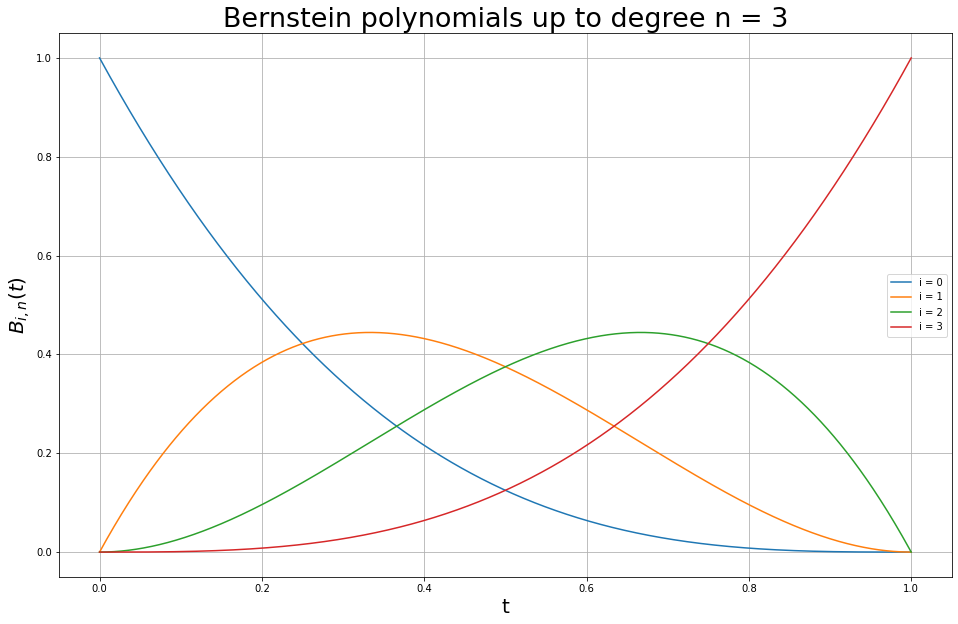

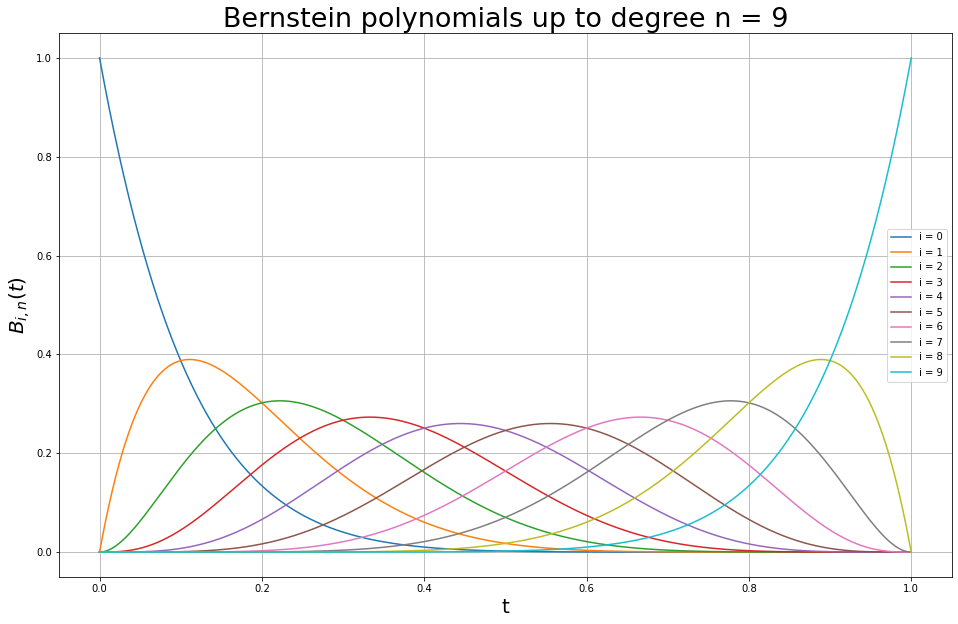

In [60]:
#Plot the Bernstein polynomial
t = np.linspace(0, 1, 1000)
plot_Bernstein(3, t)
plot_Bernstein(9, t)

## Problem 2: Properties of (composite) Bézier curves

We consider the points $\mathbf p_0,\ldots,\mathbf p_n \in \mathbb R^d$ and $\mathbf q_0,\ldots \mathbf q_n\in \mathbb R^d$ and their corresponding Bézier curves $\mathbf c(t) = \mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ and $\mathbf d(t) = \mathbf b(t; \mathbf q_0,\ldots, \mathbf q_n)$, respectively.

In this problem, we will also consider _composite Bézier curves_, or piecewise Bézier curves, e.g. a curve $\mathbf s \colon [0,2] \to \mathbb R^d$ defined by

$$
\mathbf s(t) = \begin{cases}
  \mathbf c(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$

1. Compute the first two derivatives $\mathbf c'(t)$ and $\mathbf c''(t)$ of $\mathbf c(t).$

___________
### Solution 2.1
We have that 
$$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i
$$

Using the relation we showed in 1.4, we get that 
$$\begin{align}
\mathbf c'(t)&=\sum_{i=0}^{n} B_{i,n}'(t)\mathbf{p}_i\\
&= \sum_{i=0}^{n} n\left(B_{i-1,n-1}(t) - B_{i,n-1}(t)\right)\mathbf{p}_i\\
&=n\left(\sum_{i=0}^{n} B_{i-1,n-1}(t)\mathbf{p}_i - \sum_{i=0}^{n} B_{i,n-1}(t)\mathbf{p}_i\right)\\ 
&= n\left(B_{-1,n-1}(t)\mathbf{p}_0+\sum_{i=1}^{n} B_{i-1,n-1}(t)\mathbf{p}_i - \sum_{i=0}^{n-1} B_{i,n-1}(t)\mathbf{p}_i+B_{n,n-1}(t)\mathbf{p}_n\right)
\end{align}$$

We know that $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$. If we set $j=i-1$, such that both sums goes from $0$ to $n-1$, we get

$$\begin{align}
\mathbf c'(t)&=n\left(\sum_{j=0}^{n-1} B_{j,n-1}(t)\mathbf{p}_{j+1} - \sum_{i=0}^{n-1} B_{i,n-1}(t)\mathbf{p}_i\right)\\
&=n\sum_{i=0}^{n-1} B_{i,n-1}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) 
\end{align}$$


To compute $\mathbf c''(t)$ we derive the expression above.



$$
\mathbf c''(t)=n\sum_{i=0}^{n-1} B_{i,n-1}'(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) 
$$
Again using the relation from 1.4 we get

$$\begin{align}
\mathbf c''(t)&=n\sum_{i=0}^{n-1} (n-1)\left(B_{i-1,n-2}(t)-B_{i,n-2}(t)\right)(\mathbf{p}_{i+1} - \mathbf{p}_i)\\
&= n(n-1)\sum_{i=0}^{n-1}\left(B_{i-1,n-2}(t)-B_{i,n-2}(t)\right)(\mathbf{p}_{i+1} - \mathbf{p}_i)\\
&=n(n-1)\left(\sum_{i=0}^{n-1}B_{i-1,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)-\sum_{i=0}^{n-1}B_{i,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)\right)\\
&=n(n-1)\Bigl(B_{-1,n-2}(t)(\mathbf{p}_{1} - \mathbf{p}_0)+\sum_{i=1}^{n-1}B_{i-1,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)-\sum_{i=0}^{n-2}B_{i,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)-B_{n-1,n-2}(t)(\mathbf{p}_{n} - \mathbf{p}_{n-1})\Bigr)
\end{align}$$

If we let $m=n+1$ we easily see that $B_{-1,n-2}(t)=B_{-1,m-1}(t)=0$ and $B_{n-1,n-2}(t)=B_{m,m-1}(t)=0$. If we set $j=i-1$, we are left with
$$\begin{align}
\mathbf c''(t)&=n(n-1)\Bigl(\sum_{j=0}^{n-2}B_{j,n-2}(t)(\mathbf{p}_{j+2} - \mathbf{p}_{j+1})-\sum_{i=0}^{n-2}B_{i,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)\Bigr)\\
&=n(n-1)\sum_{i=0}^{n-2}B_{i,n-2}(t)(\mathbf{p}_{i}- 2\mathbf{p}_{i+1} +\mathbf{p}_{i+2})
\end{align}$$

_______

2. What values does $\mathbf c(t)$ attend at its end points? State $\mathbf c(0)$ and $\mathbf c(1).$

__________
### Solution 2.2

$$\begin{align}
\mathbf c(0)&= \lim_{t\to0^+}\mathbf c(t)\\
&= \lim_{t\to0^+} \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i\\
&=\lim_{t\to0^+}\left(B_{0,n}(t)\mathbf p_0+\sum_{i=1}^{n} B_{i,n}(t)\mathbf{p}_i\right)\\
\end{align}$$

We easily see that $\lim_{t\to0^+}\sum_{i=1}^{n} B_{i,n}(t)\mathbf{p}_i=\sum_{i=1}^{n} B_{i,n}(0)\mathbf{p}_i=0$, since $B_{i,n}(0)=0$ for every $0<i<n$.

We are then left with $\mathbf c(0)=\lim_{t\to0^+} B_{0,n}(t)\mathbf p_0$. Using the same property as in 1.2, $\lim_{t\to0^+} t^0=1$, we get

$$\begin{align}
\mathbf c(0)&= \lim_{t\to0^+} {n \choose 0}t^0(1-t)^{n}\mathbf{p}_0\\
&= \lim_{t\to 0^+} t^0\mathbf{p}_0\\
&=\mathbf{p}_0
\end{align}$$ 

Similarly for $\mathbf c(1)$

$$\begin{align}
\mathbf c(1) &= \lim_{t\to1^-}\mathbf c(t)\\
&=\lim_{t\to1^-}\sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i\\
&=\lim_{t\to1^-}\left(\sum_{i=0}^{n-1} B_{i,n}(t)\mathbf{p}_i+B_{n,n}(t)\mathbf{p}_n\right)
\end{align}$$
Here we see that $\lim_{t\to1^-} \sum_{i=0}^{n-1} B_{i,n}(t)\mathbf{p}_i=\sum_{i=0}^{n-1} B_{i,n}(1)\mathbf{p}_i=0$. We are then left with $\mathbf c(1)=\lim_{t\to1^-}B_{n,n}(t)\mathbf{p}_n$. Using the same property as in 1.2, $\lim_{t\to 1^-} (1-t)^0=1$, we get

$$\begin{align}
&= \lim_{t\to1^-} {n \choose n}t^n(1-t)^{0}\mathbf{p}_n\\
&= \lim_{t\to1^-}(1-t)^{0}\mathbf{p}_n\\
&= \mathbf{p}_n   
\end{align}$$
__________

3. Prove that the following properties hold:
   1. $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$
   2. $\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$
   3. $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$
   4. $\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$

_________
### Solution 2.3

A)
$$\begin{align}
\mathbf c'(0)&=\lim_{t\to0} \left(n\sum_{i=0}^{n-1} B_{i,n-1}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)\right)
\end{align}$$

From the discussion in 2.2 we have that
$$\begin{equation}
  \lim_{t\to0}B_{i,n}(t)=\begin{cases}
    0, \quad & i=1,\ldots,n\\
    1, \quad & i=0
  \end{cases}
  \tag{1}
\end{equation}$$

for every $n$, we get
$$\begin{align}
\mathbf c'(0)&= nB_{0,n-1}(t)(\mathbf{p}_{0+1} - \mathbf{p}_0)\\
&=n(\mathbf{p}_{1} - \mathbf{p}_0)  
\end{align}$$

B) 

As in A) we use $(1)$ and get

$$\begin{align}
\mathbf c''(0)&= \lim_{t\to 0}n(n-1)\sum_{i=0}^{n-2}B_{i,n-2}(t)(\mathbf{p}_{i}- 2\mathbf{p}_{i+1} +\mathbf{p}_{i+2})\\
&=\lim_{t\to0} n(n-1)B_{0,n-2}(t)(\mathbf{p}_{0}- 2\mathbf{p}_{1} +\mathbf{p}_{2})\\
&=n(n-1)(\mathbf{p}_{0}- 2\mathbf{p}_{1} +\mathbf{p}_{2})
\end{align}$$

C)

From the discussion in 2.2, we have that 
$$\begin{equation}
  \lim_{t\to1}B_{i,n}(t)=\begin{cases}
    0, \quad & i=0,\ldots,n-1\\
    1, \quad & i=n
  \end{cases}
  \tag{2}
\end{equation}$$

for every $n$.

$$\begin{align}
\mathbf c'(1)&=\lim_{t\to 1}n\sum_{i=0}^{n-1} B_{i,n-1}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)\\ 
&= \lim_{t\to 1}nB_{n-1,n-1}(t)(\mathbf{p}_{n} - \mathbf{p}_{n-1})\\
&= n(\mathbf{p}_{n} - \mathbf{p}_{n-1})
\end{align}$$

D) 

As in C) we use $(2)$ and get

$$\begin{align}
\mathbf c''(1)&=\lim_{t\to 1}n(n-1)\sum_{i=0}^{n-2}B_{i,n-2}(t)(\mathbf{p}_{i}- 2\mathbf{p}_{i+1} +\mathbf{p}_{i+2})\\ &=\lim_{t\to 1}n(n-1)B_{n-2,n-2}(t)(\mathbf{p}_{n-2}- 2\mathbf{p}_{n-1} +\mathbf{p}_{n})\\
&=n(n-1)(\mathbf{p}_{n-2}- 2\mathbf{p}_{n-1} +\mathbf{p}_{n})   
\end{align}$$
_________

4. Use the recursion property of Bernstein polynomials to prove the recursive definition
   $$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = (1-t)b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + tb_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n).
   $$

_________
### Solution 2.4

Starting with the definition of the Bézier function, and then using the recursion property of the Bernstein polynominals we get
$$\begin{align}
\mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) &= \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i\\
&= \sum_{i=0}^{n}\left((1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)\right)\mathbf{p}_i\\
&= \sum_{i=0}^{n}(1-t)B_{i,n-1}(t)\mathbf{p}_i  + \sum_{i=0}^{n} tB_{i-1,n-1}(t)\mathbf{p}_i\\
&= (1-t)B_{n,n-1}(t)\mathbf{p}_n+ \sum_{i=0}^{n-1}(1-t)B_{i,n-1}(t)\mathbf{p}_i  +tB_{-1,n-1}(t)\mathbf{p}_0+ \sum_{i=1}^{n} tB_{i-1,n-1}(t)\mathbf{p}_i.  
\end{align}$$

We know that $B_{n,n-1}=0$ and $B_{-1,n-1}=0$, and by defining $j$ to be $i-1$ we are left with 
$$\begin{align}
\mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) &=\sum_{i=0}^{n-1}(1-t)B_{i,n-1}(t)\mathbf{p}_i + \sum_{i=1}^{n} tB_{i-1,n-1}(t)\mathbf{p}_i\\ 
&= (1-t)\sum_{i=0}^{n-1}B_{i,n-1}(t)\mathbf{p}_i + t\sum_{j=0}^{n-1} B_{j,n-1}(t)\mathbf{p}_{j+1}  
\end{align}$$

Now since $\mathbf b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) = \sum_{i=0}^{n-1}B_{i,n-1}(t)\mathbf p_i$ and $\mathbf b_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n) = \sum_{i=0}^{n-1}B_{i,n-1}(t)\mathbf p_{i+1}$ we get that 


$$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = (1-t)\mathbf b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + t\mathbf b_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n),
   $$

_________

5. The recursion from point 4 of this problem can be used to define the so-called “de Casteljau” algorithm to evaluate $\mathbf b_n(t_0;\mathbf p_0,\ldots,\mathbf p_n)$ at $t_0 \in [0,1]$ algorithm:
   
   Starting with $\mathbf p_{0,i}(t_0) = \mathbf p_i$ compute for $k=0,\ldots,n$ and $i=0,\ldots,k$
   
   $$
   \mathbf p_{k,i}(t_0) = (1-t_0)\mathbf p_{k-1,i}(t_0) + t_0\mathbf p_{k-1,i+1}(t_0),
   $$
   then $\mathbf b_n(t_0; \mathbf p_0,\ldots,\mathbf p_n) = \mathbf p_{n,0}.$
   
   Implement a function `deCasteljau(P,t)` where `P` is a vector – of $n+1$ points – to evaluate the corresponding  Bézier curve at $t$.
   
   This function should also return (as a second return value) a vector `Pvecs` that contains a vector of points for every “level” $k$ considered.
   
   Plot the corresponding curve for the points 
   
   $$
   \mathbf p_{0} = \begin{pmatrix}0\\0\end{pmatrix},\quad
   \mathbf p_{1} = \begin{pmatrix}2\\3\end{pmatrix},\quad
   \mathbf p_{2} = \begin{pmatrix}4\\0\end{pmatrix},\quad
   \mathbf p_{3} = \begin{pmatrix}6\\-3\end{pmatrix},\quad
   \mathbf p_{4} = \begin{pmatrix}8\\0\end{pmatrix},
   $$
   
   including one line per “level” $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$

In [61]:
def deCasteljau(P, t):
    """
    deCasteljau algorithm

    Arguments
    ---------------------------------------
        P: dim x n - matrix
            dim is the dimension of the points and n is number of points
        t: float
            time-step to be evaluated
    
    Returns
    ---------------------------------------
    tuple:
        1st element:
            The point of bernstein polynomial at time t.
        2nd element:
            The point of each level of Bernstein polynomial at time t.
    """
    d, K = P.shape #dimension, number of points
    Pvecs = np.zeros((K, d, K))
    Pvecs[0] = P

    for k in range(1, K):
        for i in range(K-k):
            Pvecs[k,:,i] = (1-t) * Pvecs[k-1,:,i] + t * Pvecs[k-1,:,i+1]

    return (Pvecs[-1,:,0], Pvecs)

def draw_each_level(P, t):
    """
    Draw each level of bernstein polynomial

    Arguments
    ---------------------------------------
        P: dim x n - matrix
            dim is the dimension of the points and n is number of points
        t: float
            time-step to be evaluated
    
    Returns
    ---------------------------------------
    None
    """

    styles = ["ro-", "bo-", "mo-", "ko-"]
    labels = ["linear", "Quadratic", "Cubic", "Quartic"]
    bezier, Pvecs = deCasteljau(P, t)
    degree, dim, n = Pvecs.shape

    for deg in range(degree-1):#For each degree
        vals = np.zeros((dim, n - deg))
        for p in range(n - deg - 1):#For each point in degree deg
            vals = Pvecs[deg,:,:n-deg]
            plt.plot(Pvecs[deg, 0, p], Pvecs[deg, 1, p], "ro-")
        
        plt.plot(vals[0], vals[1], styles[deg], label = labels[deg])
    
    plt.scatter(bezier[0], bezier[1], color = "forestgreen")

    return None

In [62]:
#Compute the bezier curve with deCasteljau algorithm
P = np.array([
    [0, 2, 4, 6, 8],
    [0, 3, 0, -3, 0]
])

t = np.linspace(0, 1, 1000)
bezier = np.array([deCasteljau(P, t)[0] for t in t])

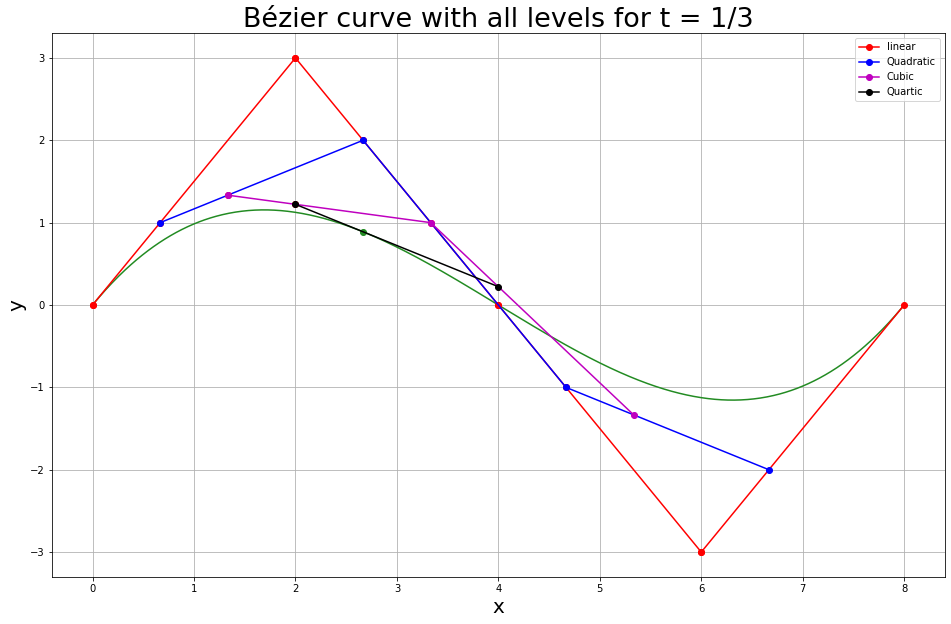

In [63]:
#Plot the bezier curve with each level at time t = 1/3
plt.plot(bezier[:,0], bezier[:,1], color = "forestgreen")
draw_each_level(P, 1/3)
plotCommands("x", "y", "Bézier curve with all levels for t = 1/3", legend = True)

In [64]:
def animate_bezier(frames, interval, P, entire = False):
    """
    Animate construction of Bézier curve

    Arguments
    ---------------------------------------
        frames: int
            Number of frames in the animation
        interval: int
            number of milliseconds between each frame
        P: 2 x n - matrix
            dim is the dimension of the points and n is number of points
        entire: bool (default: false)
            Animate for the whole time if true, else animate only up to t = 1/3
    
    Returns
    ---------------------------------------
    anim: the gif
    """

    fig = plt.figure()
    ax = plt.axes(xlim = (0,8), ylim = (-3.5, 3.5))

    title = ax.text(0.1, 3.2, f"t = {0}")

    plt.grid()
    plt.title("Animated Bézier curve")
    plt.xlabel("x")
    plt.ylabel("y")

    #Plot the fixed linear line
    for i in range(4):
        linear = np.array([deCasteljau(P, t)[1][1,:,i] for t in t])
        plt.plot(linear[:,0], linear[:,1], color = "red")
        plt.scatter(linear[:,0][0], linear[:,1][0], color = "red")

    plt.scatter(linear[:,0][-1], linear[:,1][-1], color = "red")

    #The bezier curve
    bezierx = []
    beziery = []
    bezier, = ax.plot([], [], color = "black", lw = 3)

    #The linear part
    linx = [0, 0, 0, 0]
    liny = [0, 0, 0, 0]
    lin, = ax.plot([], [], "bo-", lw = 3)

    #The quadratic part
    quadx = [0, 0, 0]
    quady = [0, 0, 0]
    quad, = ax.plot([], [], "go-", lw = 3)

    #The cubic part
    cubx = [0, 0]
    cuby = [0, 0]
    cub, = ax.plot([], [], "mo-", lw = 3)

    point, = ax.plot(0, 1, color = "black", marker = "o", lw = 5)
    
    def draw_bezier(i):
        if entire:#Animate the entire bezier curve
            if i <= 8*frames//9:
                t = 9/(8 * frames) * i
            else:
                t = 1
        else:#Animate only up to t = 1/3
            if i <= 2*frames//3:
                t = 1/(2 * frames) * i
            else:
                t = 1/3

        p, Pvecs = deCasteljau(P, t)
        degree, dim, n = Pvecs.shape

        for m in range(n - 1):
            linx[m] = Pvecs[1, 0, m]
            liny[m] = Pvecs[1, 1, m]
        
        for m in range(n - 2):
            quadx[m] = Pvecs[2, 0, m]
            quady[m] = Pvecs[2, 1, m]
        
        for m in range(n - 3):
            cubx[m] = Pvecs[3, 0, m]
            cuby[m] = Pvecs[3, 1, m]


        bezierx.append(p[0])
        beziery.append(p[1])

        bezier.set_data(bezierx, beziery)
        lin.set_data(linx, liny)
        quad.set_data(quadx, quady)
        cub.set_data(cubx, cuby)

        point.set_data([p[0]], [p[1]])

        title.set_text(f"t = {t:.3f}")

        return [bezier, lin, quad, cub, point]

    anim = FuncAnimation(fig, draw_bezier, frames = frames, interval = interval, blit = True)

    return anim

In [65]:
#plt.rcParams["figure.figsize"] = (6,6)#Decrease figure size to save memory
#anim = animate_bezier(300, 20, P)
#anim.save('bezier.gif', writer='imagemagick') #Save gif to a file
#HTML(anim.to_jshtml())#Play gif directly in the notebook

![SegmentLocal](gifs/entireBezier.gif "Animated Bézier curve")

In [66]:
plt.rcParams["figure.figsize"] = (10, 10) #Advantage to have equal size in x and y henceforth

6. Consider a _composite Bézier curve_ $\mathbf s(t)$ as described in the beginning of this problem. Assume we want $\mathbf s(t)$ to be a $C^{(k)}$, $k=0,1,2$ function. Then surely, increasing the class $k$ increases the dependent properties we have to impose.
   1. What are the critical points of $\mathbf s(t)$ to investigate for the property to be a $C^{(k)}$ function?
   2. Which properties have to hold for continuity ($k=0$)? 
   3. Which properties have to hold for $\mathbf s(t)$ to be continuously differentiable ($k=1$) ?
   4. Which properties have to hold for $\mathbf s(t)$ to be twice continuously differentiable ($k=2$) ?
   
   Try to simplify the conditions for the third and fourth point based on the properties you derived before.
   
   5. What changes if we want $\mathbf s(t)$ to be periodic, i.e. $s(t) = s(2+t)$ for all $t$ for the continous differentiability case $k=1$? 

_______
### Solution 2.6
A) 

Since both $\mathbf c(t)$ and $\mathbf d(t)$ are Beziers curves, we know that they are a $C^{(k)}$ for all $t$, so we only need to cheek in the transtion from $\mathbf c$ to $\mathbf d$, that is when $t\to 1$. We have that $\mathbf d(t) = \mathbf b(t; \mathbf q_0,\ldots, \mathbf q_n)$ and $\mathbf d(t-1)$ is defined for $t=1$ and we need to check if $\lim_{t\to1^-}\mathbf c^{(k)}(t)=\mathbf d^{(k)}(0)$ for all $k$. 

B)

$\lim_{t\to1^-}\mathbf c(t) =\mathbf d(0)$ must hold. From 2.2 we have that $\lim_{t\to 1^{-1}} \mathbf c(t) = \mathbf p_n$  and that $\mathbf d(0)=\mathbf q_0$. Therefore $\mathbf p_n$ must equal $\mathbf q_0$.

C) 

In addition to the property in B), $\lim_{t\to 1^{-1}} \mathbf c'(t) = \mathbf d'(0)$ must hold. We know from 2.3  that $\lim_{t\to 1^{-1}} \mathbf c'(t) = n(\mathbf p_n-\mathbf p_{n-1})$, and that $\mathbf d'(0)= n(\mathbf q_1-\mathbf q_0)$. Then we have that $\mathbf p_n = \mathbf q_0$ and $\mathbf p_{n-1}=2\mathbf q_{0}-\mathbf q_1$ must hold. 

D) 

In addition to the properties in C), $\lim_{t\to 1^{-1}} \mathbf c''(t) = \mathbf d''(0)$ must hold. We know from 2.3 that $\lim_{t\to 1^{-1}} \mathbf c''(t) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2})$ and that $ \mathbf d''(0) = n(n-1)(\mathbf q_0-2\mathbf q_1 + \mathbf q_2)$. This means that $\mathbf p_n = \mathbf q_0$, $\mathbf p_{n-1}=2\mathbf q_{0}-\mathbf q_1$ and $\mathbf p_{n-2}=4\mathbf q_0-4\mathbf q_1 +\mathbf q_2$ must hold.

E) 

If $\mathbf s(t)$ is periodic such that $\mathbf s(t)=\mathbf s(2+t)$ we also get the constraints that $\mathbf s(0)=\mathbf s(2)$ and $\mathbf s'(0)=\mathbf s'(2)$ must hold. We have that $\mathbf s(0)=\mathbf c(0)=\mathbf p_0$ and $\mathbf s(2)=\mathbf d(2-1)=\mathbf d(1)=\mathbf q_n$ and also $\mathbf s'(0)=\mathbf c'(0)= n(\mathbf p_1-\mathbf p_0)$ and $\mathbf s'(2)=\mathbf d'(2-1)=\mathbf d'(1) = n(\mathbf q_n-\mathbf q_{n-1})$. Then we get the conditions that $\mathbf p_0=\mathbf q_n$ and $\mathbf p_1=2\mathbf p_n -\mathbf q_{n-1}$ must hold in addition to the ones in C), that is $\mathbf p_n = \mathbf q_0$ and $\mathbf p_{n-1}=2\mathbf q_0 +\mathbf q_1$.
_______

## Problem 3: Interpolation with (composite, cubic) Bézier curves

The most prominent variant are – similar to $B$ splines – again those Bézier curves that yield cubic polynomials, i.e. $\mathbf b_3(t; \mathbf p_0,\mathbf p_1,\mathbf p_2,\mathbf p_3)$. To obtain a spline, we consider _composite Bézier curves_, i.e. we “stitch together” several Bézier curves (as considered for the case of 2 curves in the last problem):

Given a number $m$ of segments and $\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i}$ for $i=1,\ldots,m$, then we define

$$
\mathbf B(t) = \begin{cases} \ & \\
b_3(t-i+1; \mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})   
& \text{ for } i-1 \leq t < i \text{ and each } i=1,\ldots,m\\
& \\
\end{cases}
$$

1. Implement a function `compositeBézier(P, t)` that evaluates $\mathbf B(t), t\in [0,m]$, where $P = (\mathbf p_{j,i})_{j=0, i=1}^{3,m}$ denotes a matrix of control points. Note that you can obtain the degree and the number of segments from the size of `P`.
   
   Test your function with the 3-segment cubic composite B spline given by
   $$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} -1\\0\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} -1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{2,1} &= \begin{pmatrix} -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{3,1} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,2} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix}  \frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix}  1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,3} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,3} &= \begin{pmatrix}  -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,3} &= \begin{pmatrix} \frac{1}{3}\\-1\end{pmatrix},\quad
   \mathbf p_{3,3} &= \begin{pmatrix}  0\\-1\end{pmatrix}\\
   \end{aligned}
   $$
   and plot the resulting (complete) curve $\mathbf B$.

In [67]:
def compositeBezier(P, t):
    """
    Composite bezier function

    Arguments
    ---------------------------------------
        P: m x dim x degree matrix
            m is the number of segments
            dim is the dimension of the problem
            degree is the number of points for each segment, the actual degree is one less
        t: float 
            Time step to be evaluated at
    Returns
    ---------------------------------------
    The point at time t
    """
    m, dim, degree = P.shape
    b = np.zeros((dim))
    for i in range(1, m + 1):
        if i - 1 <= t < i:
            for j in range(degree):
                b += Bernstein(j, degree - 1, t - i + 1) * P[i-1, :, j]
    return b

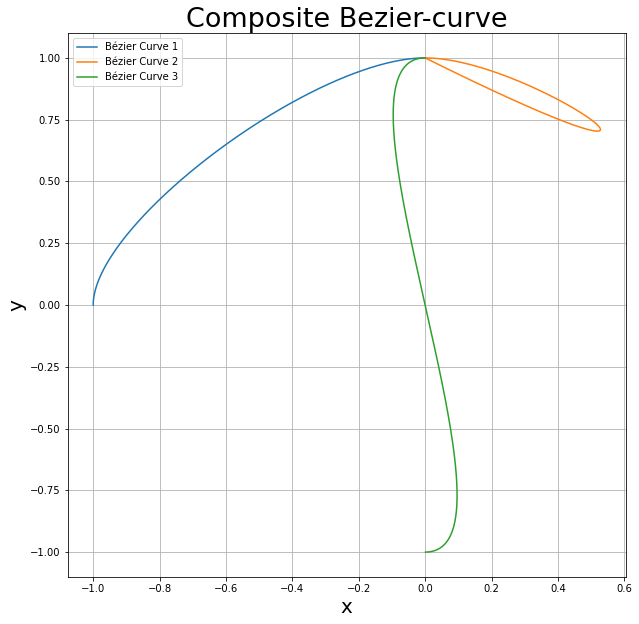

In [68]:
P = np.array([
    [
        [-1, -1, -1/3, 0],
        [0, 1/3, 1, 1]
    ],
    [
        [0, 1/3, 1, 0],
        [1, 1, 1/3, 1]
    ],
    [
        [0, -1/3, 1/3, 0],
        [1, 1, -1, -1]
    ]
])

#Plot each segment seperately to make them distinct, but it is possible to plot them together at once
for i in range(3):
    t = np.linspace(i, i+1, 1000, endpoint = False)
    B = np.array([
        compositeBezier(P, t) for t in t
    ])
    plt.plot(B[:,0], B[:,1], label = f"Bézier Curve {i+1}")


plotCommands("x", "y", "Composite Bezier-curve", legend = True)

2. Use the properties derived so far to derive an algorithm for the following problem:
   
   Given data points $\mathbf a_0,\ldots,\mathbf a_{m-1} \in \mathbb R^d$ and velocities $\mathbf v_0, \mathbf v_1, \ldots, \mathbf v_{m-1}, \in \mathbb R^d$.
   
   Find the _periodic composite cubic Bézier curve_ $\mathbf B(t)$ that maps from $[0,m]$ to $\mathbb R^d$ with the following properties
   * $\mathbf B(0) = \mathbf B(m),$
   * $\mathbf B'(0) = \mathbf B'(m),$
   * $\mathbf B(i) = \mathbf a_i$ for $i=0,\ldots,m-1,$
   * $\mathbf B'(i) = \mathbf v_i$ for $i=0,\ldots,m-1.$

   You can for example first sketch the algorithm or a few ideas in $\LaTeX$.
   
   Then implement a function `interpolate_periodic(A,V)` where `A` is the vector of the interpolation points $[\mathbf a_0,\ldots,\mathbf a_{m-1}]$ and `V` is the vector of the velocities $[\mathbf v_0,\ldots,\mathbf v_{m-1}]$.   
   The function should return a matrix `P` like in the first part to be able to plot the result.

### Solution 3.2
We have that 
$$
\mathbf B(t) = \begin{cases} \ & \\
\mathbf b_3(t-i+1; \mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})   
& \text{ for } i-1 \leq t < i \text{ and each } i=1,\ldots,m\\
& \\
\end{cases}
$$

If we use what we found in 2.2, we get that $\mathbf B(i-1) =\mathbf b_3(0; \mathbf p_{0,i+1}, \mathbf p_{1,i+1}, \mathbf p_{2,i+1}, \mathbf p_{3,i+1})=  \mathbf p_{0,i}$ for $i=1,\ldots,m$.  We get that $\mathbf p_{0,i}=\mathbf a_{i-1}$. Also due to continuity we have that $\mathbf p_{0,i+1}=\mathbf p_{3,i}$ and we get that $\mathbf p_{3,i}=\mathbf a_{i}$.

From 2.3 we have that
   $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$ and 
    $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1})$
   
Using that we have a differentiable Bezier curve with velocity $\mathbf v_i$ in $\mathbf B(i)$ we get that 

We want a continuous differentiable Bezier curve where $\mathbf B'(i)=\mathbf v_i$, we then need to set 
$$\lim_{t\to i^{-}}\mathbf B'(t)=\mathbf B'(i)$$ 
that is 
$$\lim_{t\to 1^-}\mathbf b_3'(t;\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})=\mathbf b_3'(0;\mathbf p_{0,i+1}, \mathbf p_{1,i+1}, \mathbf p_{2,i+1}, \mathbf p_{3,i+1})
$$
Using the property from 2.3 we get
$$
3(\mathbf p_{3,i}-\mathbf p_{2,i})=3(\mathbf p_{1,i+1}-\mathbf p_{0,i+1})\\
3(\mathbf a_i-\mathbf p_{2,i})=3(\mathbf p_{1,i+1}-\mathbf a_i)=\mathbf v_{i}
$$

From this we get 
$$\mathbf p_{1,i}=\frac{\mathbf v_{i-1}}{3}+\mathbf a_{i-1}\\
\mathbf p_{2,i}=\mathbf a_i- \frac{\mathbf v_{i}}{3}$$

We can now express the points needed to compute the curve as 
$$
(\mathbf p_{0,i},\mathbf p_{1,i},\mathbf p_{2,i},\mathbf p_{3,i}) =\left(\mathbf a_{i-1},\mathbf a_{i-1}+\frac{\mathbf v_{i-1}}{3},\mathbf a_i- \frac{\mathbf v_{i}}{3}, \mathbf a_{i}\right) \quad i=1,\dots,m
$$

Due to periodicity we have that $\mathbf a_m=\mathbf a_0$ and $\mathbf v_0=\mathbf v_m$.

In [69]:
def interpolate_periodic(A, V, degree = 4):
    """
    Interpolate each point and draw cubic bezier curves between them (as default)

    Arguments
    ---------------------------------------
        A:dim x m
            dim is dimension of the problem
            m is the number of interpolation points
    Returns
    ---------------------------------------
    P: m x dim x degree matrix
        m is the number of points
        dim is the problem dimension
        degree is the number of points for each segment, the actual degree is one lower
    t:
        array of time-points
    """
    dim, m = A.shape
    P = np.zeros((m, dim, degree))
    
    for i in range(m-1):
        P[i,:] = np.array([A[:,i], A[:,i] + 1/3*V[:,i], A[:,i+1] - 1/3*V[:,i+1], A[:,i+1]]).T
    
    P[-1,:] = np.array([A[:,-1], A[:,-1] + 1/3*V[:,-1], A[:,0] - 1/3*V[:,0], A[:,0]]).T

    t = np.linspace(0, m, m*1000, endpoint = False)

    return P, t

def draw_bezier_comp(P, A, t, title):
    """
    Draw the composite bezier curve, with the interpolation points

    Arguments
    ---------------------------------------
        P: m x dim x degree matrix
            m is the number of segments
            dim is the dimension of the problem
            degree is the number of points for each segment, the actual degree is one less
        A: dim x m - matrix
            dim is the dimension of the problem
            m is the number of points 
        t: float 
            Time step to be evaluated at
        title: string
            title of plot-figure
    Returns
    ---------------------------------------
    None
    """

    B = np.array([compositeBezier(P, t) for t in t])

    plt.plot(B[:,0], B[:,1], color = "red", label = "Bézier composition")
    plt.scatter(A[0], A[1], color = "forestgreen", label = "Interpolation points")
    plotCommands("x", "y", title, legend = True)

    return None

def draw_bezier(P, t):
    """
    Draw the composite bezier curve

    Arguments
    ---------------------------------------
        P: m x dim x degree matrix
            m is the number of segments
            dim is the dimension of the problem
            degree is the number of points for each segment, the actual degree is one less
        t: float 
            Time step to be evaluated at
    Returns
    ---------------------------------------
    None
    """
    B = np.array([compositeBezier(P, t) for t in t])
    plt.plot(B[:,0], B[:,1], color = "red", label = "Bézier composition")
    plotCommands("x", "y", "Bézier Curve", legend = True)
    return None

def mod_P(P, matrix, const = 0):
    """
    Transform P with a matrix multiplication and addition of constant vector

    Arguments
    ---------------------------------------
        P: m x dim x degree matrix
            m is the number of segments
            dim is the dimension of the problem
            degree is the number of points for each segment, the actual degree is one less
        matrix: dim x dim matrix
            Multiply each point with the matrix
        const: dim x 1 matrix
            add const to each point
    Returns
    ---------------------------------------
    modified: matrix with same shape as P
        the tranformed matrix
    """
    modified = np.zeros(P.shape)
    m, dim, degree = modified.shape
    
    for i in range(m):
        for j in range(degree):
            modified[i,:,j] = matrix @ P[i,:,j] + const

    return modified

3. Take your favourite letter from the alphabet. Draw its outline – 
i.e. a closed curve surrounding the letter– on a graph paper (those with a regular 2D grid) and take a few measurements of points and velocities. Use this data to illustrate how your function from 2 works. 

   _Hint_: a good idea is to take a letter without holes that only consist of one component like `t` or `T` (maybe not the little boring `l`).
    
   _Bonus Task_: Ignore the hint and do something fancy with `å`, `æ`, `ø`, or even `ß` (though that can be done with one outline in most this fonts).

___________
### Solution 3.3

In [70]:
A=np.array([
    [1.0,1.75,2.5,3.5,3.75,2.75,1.75,2.5,3.0,3.5,4.0,3.6,2.5,1.4,1.0,2.4,2.75,2.4,1.75,1.25],
    [0.5,0.25,0.0,0.5,1.5,3.25,4.75,5.4,4.75,4.75,5.0,5.75,6,5.6,4.5,2.75,1.5,0.7,1.5,1.5]
])

V=np.array([
    [0.5,2.0,1.0,1.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.1,-1.0,-1.0,-1.0,0.0,1.0,-0.1,-1.0,-1.0,-1.0],
    [-1,0.5,0.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.5,2.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0]
])

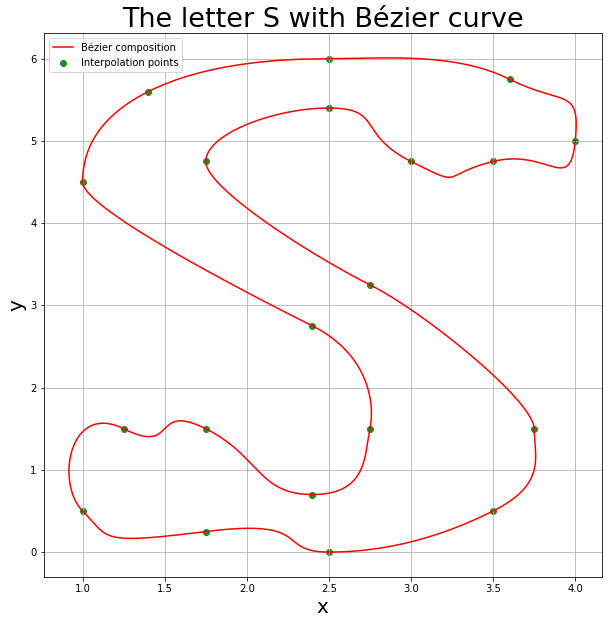

In [71]:
P, t = interpolate_periodic(A, V)
draw_bezier_comp(P, A, t, "The letter S with Bézier curve")

4. Take the resulting control points from part 3 of this problem and create the following new curves with new sets of points given by
   1. `Q` where each $\mathbf q_{i,j} = 2\mathbf p_{i,j}$
   2. `R` where each $\mathbf r_{i,j} = \begin{pmatrix} \cos\frac{\pi}{4} & -\sin\frac{\pi}{4}\\ \sin\frac{\pi}{4} & \cos\frac{\pi}{4}\end{pmatrix}\mathbf p_{i,j}$
   3. `S` where each $\mathbf s_{i,j} = \begin{pmatrix} 1 & \frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\1\end{pmatrix}$
   4. `T` where each $\mathbf t_{i,j} = \begin{pmatrix} -1 & -\frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\-1\end{pmatrix}$
   where each $i=0,1,2,3$ and $j=0,\ldots,m-1$

____
### Solution 3.4

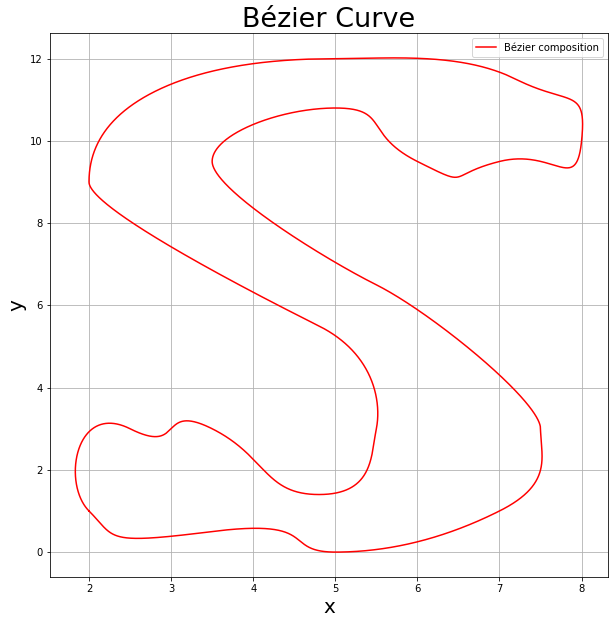

In [72]:
draw_bezier(2*P, t)

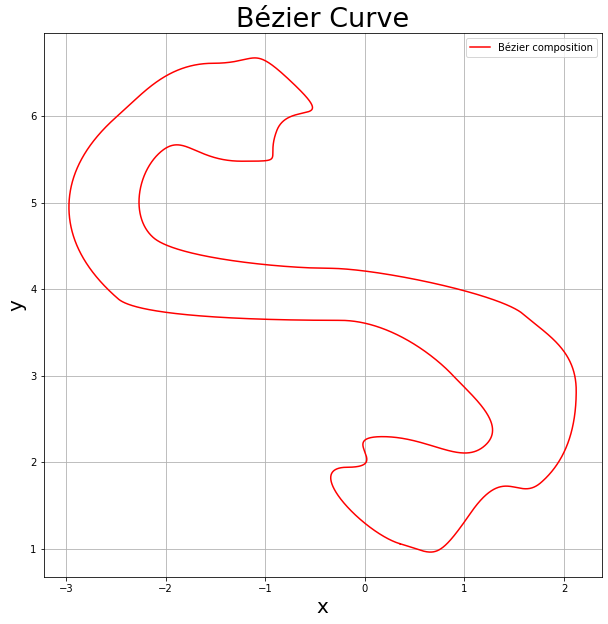

In [73]:
R = np.array([
    [np.cos(np.pi/4), -np.sin(np.pi/4)],
    [np.sin(np.pi/4), np.cos(np.pi/4)]
])
draw_bezier(mod_P(P, R), t)

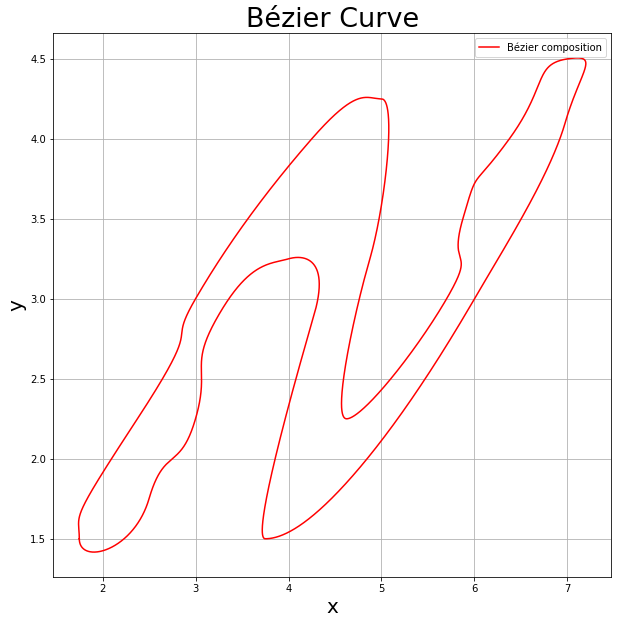

In [74]:
S_matrix = np.array([
    [1, 1/2],
    [1, 0]
])

S_const = np.array([1/2, 1/2])
draw_bezier(mod_P(P, S_matrix, S_const), t)

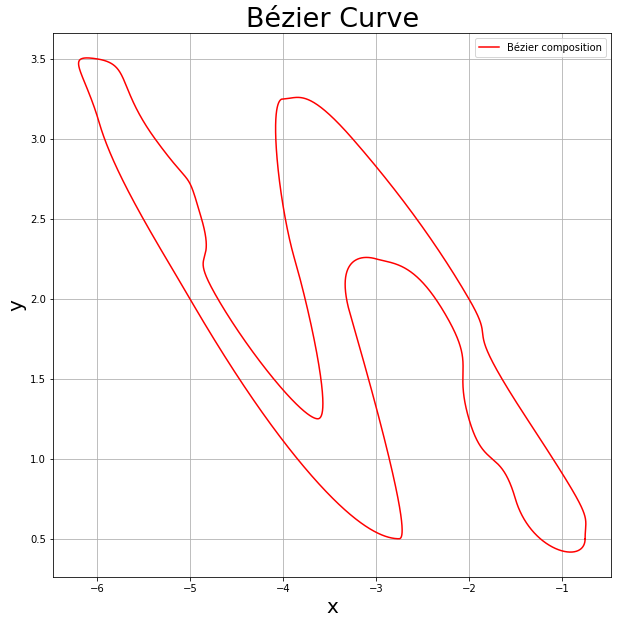

In [75]:
T_matrix = np.array([
    [-1, -1/2],
    [1, 0]
])

T_const = np.array([1/2, -1/2])
draw_bezier(mod_P(P, T_matrix, T_const), t)

## Problem 4: Optimisation with Bézier curves

Similar to Problem 3, assume we have a composite cubic Bézier curve $\mathbf B(t)$ (here just not necessarily periodic) with $m$ segments, i.e. control points $\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1}, \mathbf p_{0,2}, \mathbf p_{1,2},\ldots,\mathbf p_{3,m}$.
We denote its segments by $\mathbf c_i\colon [i-1,i] \to \mathbb R^2$, for  $i=1,\ldots,m$.
Then $\mathbf B(t)$ is defined on $[0,m]$.
Assume further that $\mathbf B(t)$ is $C^{(1)}$.

1. Due to the property of $\mathbf B(t)$ being continuous, we have
   $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ for $i=1,\ldots,m-1$, so we can omit “storing” the redundant data of $\mathbf p_{3,i}.$
   
   Similarly due to the differentiability we can express $\mathbf p_{2,i}$ using $\mathbf p_{0,i+1}$ and $\mathbf p_{1,i+1}$ for each $i=1,\ldots,m-1$. What does this expression look like?
   
   _Bonus question_: The “data” we store for $\mathbf p_{2,i}$ and/or $\mathbf p_{1,{i+1}}$ is just one vector in $\mathbb R^d$. Can we phrase this information in terms of the velocity $\mathbf v_{i+1}$ at $\mathbf p_{0,i+1}$, i.e. such that from this velocity we can recover both “neighboring” points?

So 
$$
\mathbf B(t) = \begin{cases} 
b_3(t; \mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1})   
& \text{ for } 0 \leq t < 1 \\
b_3(t-1; \mathbf p_{0,2}, \mathbf p_{1,2}, \mathbf p_{2,2}, \mathbf p_{3,2})   
& \text{ for } 1 \leq t < 2\\
...\\
b_3(t-m+1; \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m})   
& \text{ for } m-1 \leq t < m
\end{cases}
$$

In the transition we have the same as in 2.6 and we then know that $\mathbf p_{2,i}=2\mathbf p_{0,i+1}-\mathbf p_{1,i+1}$.
________

2. We want to minimize the (squared) acceleration of the curve
   $$
   F(\mathbf P)
   =
   \int_{0}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   with respect to the remaining control points
   $$
   \mathbf P= [\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{0,2}, \mathbf p_{1,2}, \ldots, \mathbf p_{0,m-1}, \mathbf p_{1,m-1} \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m}, ].
   $$

   For simplicity we only consider one segment, i.e. for $\mathbf q_0,\mathbf q_1, \mathbf q_2, \mathbf q_3 \in \mathbb R^2$, we consider the cubic Bézier curve $\mathbf b_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$.
   
   First derive a closed form for the integral
   
   $$
   \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\ \mathrm{d} t
   $$
   
   in order to derive the gradient of 
   $$
   \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 \ \mathrm{d} t
   $$
   and with respect to the control points $\mathbf q_i, i=0,\ldots,3$.
   
   While we do not want to write down the whole gradient of $F$, please sketch how you can use the result of $\tilde F$ to compute the gradient of $F$. Remember that $\mathbf B(t)$ is continuously differentiable.

------
Starting by finding an expression for $\tilde F$. 
We know that 

$$
\mathbf B(t) = \begin{cases} 
b_3(t; \mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1})   
& \text{ for } 0 \leq t < 1 \\
b_3(t-1; \mathbf p_{0,2}, \mathbf p_{1,2}, \mathbf p_{2,2}, \mathbf p_{3,2})   
& \text{ for } 1 \leq t < 2\\
...\\
b_3(t-m+1; \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m})   
& \text{ for } m-1 \leq t < m
\end{cases}
$$


We use that 

$$ 
   c''(t) = b_n''(t; \mathbf p_{0}, \mathbf p_{1}, \mathbf p_{2}, \mathbf p_{3})
   =
   n(n-1)\sum_{i=0}^{n-2}B_{i,n-2}(t)(\mathbf{p}_{i}- 2\mathbf{p}_{i+1} +\mathbf{p}_{i+2}) 
$$

And if $n= 3$ we get:

$$\begin{align} 
   b_3''(t; \mathbf p_{0}, \mathbf p_{1}, \mathbf p_{2}, \mathbf p_{3})
   &=
   6\sum_{i=0}^{1}B_{i,1}(t)(\mathbf{p}_{i}- 2\mathbf{p}_{i+1} +\mathbf{p}_{i+2})\\
   &=
   6\Bigl(B_{0,1}(t)(\mathbf{p}_{0}- 2\mathbf{p}_{1} +\mathbf{p}_{2})+B_{1,1}(t)(\mathbf{p}_{1}- 2\mathbf{p}_{2} +\mathbf{p}_{3})\Bigr)
\end{align}$$

Now since $B_{0,1}(t)=1-t$ and $B_{1,1}(t)=t$, we get 

$$ 
   b_3''(t; \mathbf p_{0}, \mathbf p_{1}, \mathbf p_{2}, \mathbf p_{3})
   =
   6\Bigl(\mathbf{p}_{0}- 2\mathbf{p}_{1} +\mathbf{p}_{2}+t(-\mathbf{p}_{0}+ 3\mathbf{p}_{1} -3\mathbf{p}_{2} +\mathbf{p}_{3})\Bigr)
$$

Now we look at

$$
   \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 \ \mathrm{d} t
   $$

By letting $\mathbf a= \mathbf{q}_{0}- 2\mathbf{q}_{1} +\mathbf{q}_{2}$ and $\mathbf b = -\mathbf{q}_{0}+ 3\mathbf{q}_{1} -3\mathbf{q}_{2} +\mathbf{q}_{3}$ we get

$$\begin{align}
\lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 &= 36\lVert \mathbf a+t\mathbf b\rVert_2^2 \\
&=
36\Bigl((a_x+tb_x)^2+(a_y+tb_y)^2\Bigr)\\ 
&=
36\Bigl(a_x^2+2ta_xb_x+t^2b_x^2+a_y^2+2a_ytb_y+t^2b_y^2\Bigr) \\
&=
36\Bigl(\lVert \mathbf a\rVert_2^2+2t\mathbf a \cdot \mathbf b+t^2\lVert \mathbf b\rVert_2^2\Bigr)
\end{align}$$

Then taking the integral from zero to one we get

$$
\tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 36\Bigl(\lVert \mathbf a\rVert_2^2+2t\mathbf a\cdot\mathbf b+t^2\lVert \mathbf b\rVert_2^2\Bigr)dt = 36\Bigl[t\lVert \mathbf a\rVert_2^2+t^2\mathbf a\cdot\mathbf b+\frac{t^3}{3}\lVert \mathbf b\rVert_2^2\Bigr]_0^1\\
=
36\Bigl(\lVert \mathbf a\rVert_2^2+\mathbf a\cdot\mathbf b+\frac{1}{3}\lVert \mathbf b\rVert_2^2\Bigr) =   36\Bigl(\lVert \mathbf{q}_{0}- 2\mathbf{q}_{1} +\mathbf{q}_{2})\rVert_2^2+(\mathbf{q}_{0}- 2\mathbf{q}_{1} +\mathbf{q}_{2})\cdot(-\mathbf{q}_{0}+ 3\mathbf{q}_{1} -3\mathbf{q}_{2} +\mathbf{q}_{3})+\frac{1}{3}\lVert -\mathbf{q}_{0}+ 3\mathbf{q}_{1} -3\mathbf{q}_{2} +\mathbf{q}_{3}\rVert_2^2\Bigr)
$$

______
Now that we have $\tilde F$ we can look at $F$. We start by seperating the integral such that 

$$\begin{align}
F(\mathbf P)
&=\int_{0}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t \\
&=\int_{0}^{1} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t+ \int_{1}^{2} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t +...+\int_{m-1}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t\\
&=\int_{0}^{1} \lVert \mathbf b_3''(t; \mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1})\rVert^2 \mathrm{d}t+ \int_{1}^{2} \lVert \mathbf b_3''(t-1; \mathbf p_{0,2}, \mathbf p_{1,2}, \mathbf p_{2,2}, \mathbf p_{3,2})\rVert^2 \mathrm{d}t +...+\int_{m-1}^{m} \lVert \mathbf b_3''(t-m+1; \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m})\rVert^2\mathrm{d}t
\end{align}$$


For every integral we have changed the $t$ such that for integral $i$ we have $t_i=t-i+1$, then $t_1=t$, $t_2=t-1$ and $t_{m}=t-m+1$. Then

$$
   F(\mathbf P)
   =
 \int_{0}^{1} \lVert \mathbf b_3''(t_0; \mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1})   
 \rVert^2 \mathrm{d}t_0+ 
 \int_{0}^{1} \lVert \mathbf b_3''(t_1; \mathbf p_{0,2}, \mathbf p_{1,2}, \mathbf p_{2,2}, \mathbf p_{3,2})   
 \rVert^2 \mathrm{d}t_1 +...+
 \int_{0}^{1} \lVert \mathbf b_3''(t_{m-1}; \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m})   
 \rVert^2 \mathrm{d}t_{m-1}
$$

All of these integrals is similiar to $\tilde F$, just with different control points. So let $\mathbf a_i$ and $\mathbf b_i$ be the variables such that $\mathbf a_i= \mathbf{p}_{0,i}- 2\mathbf{p}_{1,i} +\mathbf{p}_{2,i}$ and $\mathbf b_i = -\mathbf{p}_{0,i}+ 3\mathbf{p}_{1,i} -3\mathbf{p}_{2,i} +\mathbf{p}_{3,i}$. Also, we don't need $p_{2,i}$ and $p_{3,i}$ for $i \neq m$ in our expression since these can be expressed by $p_{3,i}=p_{0,i+1}$ and $p_{2,i}=2p_{0,i+1}-p_{1,i+1}$. We are then left with:


$$\begin{align}
   F(\mathbf P)
&=36\sum_{i=1}^m \Bigl(\lVert \mathbf a_i\rVert_2^2+\mathbf a_i\cdot \mathbf b_i+\frac{1}{3}\lVert \mathbf b_i\rVert_2^2\Bigr)\\
&=36\sum_{i=1}^m \Bigl(\lVert \mathbf{p}_{0,i}- 2\mathbf{p}_{1,i} +\mathbf{p}_{2,i})\rVert_2^2+(\mathbf{p}_{0,i}- 2\mathbf{p}_{1,i} +\mathbf{p}_{2,i})\cdot(-\mathbf{p}_{0,i}+ 3\mathbf{p}_{1,i} -3\mathbf{p}_{2,i} +\mathbf{p}_{3,i})+\frac{1}{3}\lVert -\mathbf{p}_{0,i}+ 3\mathbf{p}_{1,i} -3\mathbf{p}_{2,i} +\mathbf{p}_{3,i}\rVert_2^2\Bigr) \\
&=36\sum_{i=1}^{m-1} \Bigl(\lVert \mathbf{p}_{0,i}- 2\mathbf{p}_{1,i} +2\mathbf{p}_{0,i+1}-\mathbf{p}_{1,i+1})\rVert_2^2
+(\mathbf{p}_{0,i}- 2\mathbf{p}_{1,i} +2\mathbf{p}_{0,i+1}-\mathbf{p}_{1,i+1})\cdot(-\mathbf{p}_{0,i}+ 3\mathbf{p}_{1,i} -5\mathbf{p}_{0,i+1}+3\mathbf{p}_{1,i+1})\\
&+\frac{1}{3}\lVert -\mathbf{p}_{0,i}+3\mathbf{p}_{1,i}-5\mathbf{p}_{0,i+1}+3\mathbf{p}_{1,i+1}\rVert_2^2\Bigr) + \Bigl(\lVert \mathbf{p}_{0,m}- 2\mathbf{p}_{1,m} +\mathbf{p}_{2,m})\rVert_2^2+(\mathbf{p}_{0,m}- 2\mathbf{p}_{1,m} +\mathbf{p}_{2,m})\cdot(-\mathbf{p}_{0,m}+ 3\mathbf{p}_{1,m} -3\mathbf{p}_{2,m} +\mathbf{p}_{3,m})\\
&+\frac{1}{3}\lVert -\mathbf{p}_{0,m}+ 3\mathbf{p}_{1,m} -3\mathbf{p}_{2,m} +\mathbf{p}_{3,m}\rVert_2^2\Bigr)\\
&=\sum_{i=1}^{m-1} \Bigl(\tilde F(\mathbf p_{0,i},\mathbf p_{1,i},2\mathbf p_{0,i+1}-\mathbf p_{1,i+1},\mathbf p_{0,i+1})\Bigr) + \tilde F(\mathbf p_{0,m},\mathbf p_{1,m},\mathbf p_{2,m},\mathbf p_{3,m})
\end{align}$$


_______

Now we will find the gradient of $\tilde F$. We need expressions for $\frac{\partial \lVert \mathbf a \rVert_2^2}{\partial \mathbf q_i}$ and $\frac{\partial \mathbf a\cdot\mathbf b}{\partial \mathbf q_i}$

Found that this is:
$$\begin{align}
\frac{\partial \lVert \mathbf a \rVert_2^2}{\partial \mathbf q} &= 2\mathbf a^T \frac{\partial \mathbf a}{\partial \mathbf q}\\
\frac{\partial \lVert \mathbf b \rVert_2^2}{\partial \mathbf q} &= 2\mathbf b^T \frac{\partial \mathbf b}{\partial \mathbf q}\\
\frac{\partial \mathbf a\cdot\mathbf b}{\partial \mathbf q} &= \mathbf a^T\frac{\partial \mathbf b}{\partial \mathbf q}+ \mathbf b^T\frac{\partial \mathbf a}{\partial \mathbf q}
\end{align}$$

From this we get:

$$\frac{\partial \tilde F}{\partial \mathbf q_0} =12(3\mathbf a^T+\mathbf b^T) = 12(2\mathbf q_0-3\mathbf q_1+\mathbf q_3)^T\\
\frac{\partial \tilde F}{\partial \mathbf q_1} =-36\mathbf a^T = 36(-\mathbf q_0+2\mathbf q_1-\mathbf q_2)^T\\
\frac{\partial \tilde F}{\partial \mathbf q_2} =-36(\mathbf a^T+\mathbf b^T) = 36(-\mathbf q_1+2\mathbf q_2-\mathbf q_3)^T\\
\frac{\partial \tilde F}{\partial \mathbf q_3} =12(3\mathbf a^T+2\mathbf b^T) = 12(\mathbf q_0-\mathbf q_2+2\mathbf q_3)^T
$$

And then by putting them in a column vector we get that the gradient of $\tilde F$ is **Forklare hvorfor jeg dropper transponert**

$$
\nabla \tilde F = \begin{pmatrix}
12(2\mathbf q_0-3\mathbf q_1+\mathbf q_3)\\
36(-\mathbf q_0+2\mathbf q_1-\mathbf q_2)\\
36(-\mathbf q_1+2\mathbf q_2-\mathbf q_3)\\
12(\mathbf q_0-3\mathbf q_2+2\mathbf q_3)
\end{pmatrix}
$$

______
Now we want to find $\nabla F$. We have that  

$$ 
F(\mathbf P) =\sum_{i=1}^{m-1} \Bigl(\tilde F(\mathbf p_{0,i},\mathbf p_{1,i},2\mathbf p_{0,i+1}-\mathbf p_{1,i+1},\mathbf p_{0,i+1})\Bigr) + \tilde F(\mathbf p_{0,m},\mathbf p_{1,m},\mathbf p_{2,m},\mathbf p_{3,m})
$$

Because of this, the gradient of $F$ can be expressed by the gradient of $\tilde F(\mathbf p_{0,i},\mathbf p_{1,i},2\mathbf p_{0,i+1}-\mathbf p_{1,i+1},\mathbf p_{0,i+1})$ with respect to the points in $P$, let this be $\nabla_P \tilde F_i$, and the gradient of $\tilde F(\mathbf p_{0,m},\mathbf p_{1,m},\mathbf p_{2,m},\mathbf p_{3,m}$, let this be $\nabla_P \tilde F_m$. Since we have $\nabla \tilde F$ this is easy because we already have a couple of terms, and since many terms will equal zero because $\tilde F_i = \tilde F(\mathbf p_{0,i},\mathbf p_{1,i},2\mathbf p_{0,i+1}-\mathbf p_{1,i+1},\mathbf p_{0,i+1})$ only depend on $\mathbf p_{0,i}$,$\mathbf p_{1,i}$,$\mathbf p_{0,i+1}$ and $\mathbf p_{1,i+1}$. In fact we only need to find $\frac{\partial \tilde F_i}{\partial \mathbf p_{0,i+1}}$ and  $\frac{\partial \tilde F_i}{\partial \mathbf p_{1,i+1}}$. We find these by using the same derivation rules as above, and then we get that 

$$\nabla_P \tilde F_i = 
\begin{pmatrix}
0\\
...\\
12(2\mathbf p_{0,i}-3\mathbf p_{1,i}+\mathbf p_{0,i+1})\\
36(-\mathbf p_{0,i}+2\mathbf p_{1,i}-2\mathbf p_{0,i+1}+\mathbf p_{1,i+1})\\
12(\mathbf p_{0,i}-6\mathbf p_{1,i}-14\mathbf p_{0,i+1}-9\mathbf p_{1,i+1})\\
36(\mathbf p_{1,i}-3\mathbf p_{0,i+1}+2\mathbf p_{1,i+1})\\
0\\
0\\
...
\end{pmatrix}
$$

where for each increment of $i$ the elements that not equal zero "move two steps down". **Forklare litt bedre** 

We can get $\nabla_P \tilde F_m$ directly from $\nabla \tilde F$ such that  

$$
\nabla_P \tilde F_m 
= \begin{pmatrix}
0\\
...\\
0\\
12(2\mathbf p_{0,m}-3\mathbf p_{1,m}+\mathbf p_{3,m})\\
36(-\mathbf p_{0,m}+2\mathbf p_{1,m}-\mathbf p_{2,m})\\
36(-\mathbf p_{1,m}+2\mathbf p_{2,m}-\mathbf p_{3,m})\\
12(\mathbf p_{0,m}-3\mathbf p_{2,m}+2\mathbf p_{3,m})
\end{pmatrix}
$$

Then by using the relation that  

$$
\nabla F = \sum_{i=1}^{m-1} \nabla_P \tilde F_i + \nabla_P \tilde F_m
$$

We have that 

$$
\nabla F = \begin{pmatrix}
12(2\mathbf p_{0,1}-3\mathbf p_{1,1}+\mathbf p_{0,2})\\
36(-\mathbf p_{0,1}+2\mathbf p_{1,1}-2\mathbf p_{0,2}+\mathbf p_{1,2})\\
12(\mathbf p_{0,1}-6\mathbf p_{1,1}+14\mathbf p_{0,2}-9\mathbf p_{1,2})\\
36(\mathbf p_{1,1}-3\mathbf p_{0,2}+2\mathbf p_{1,2})\\
0\\
0\\
0\\
...
\end{pmatrix}
+
\begin{pmatrix}
0\\
0\\
12(2\mathbf p_{0,2}-3\mathbf p_{1,2}+\mathbf p_{0,3})\\
36(-\mathbf p_{0,2}+2\mathbf p_{1,2}-2\mathbf p_{0,3}+\mathbf p_{1,3})\\
12(\mathbf p_{0,2}-6\mathbf p_{1,2}+14\mathbf p_{0,3}-9\mathbf p_{1,3})\\
36(\mathbf p_{1,2}-3\mathbf p_{0,3}+2\mathbf p_{1,3})\\
0\\
...
\end{pmatrix}\\
+
...
+
\begin{pmatrix}
...\\
0\\
12(2\mathbf p_{0,m-1}-3\mathbf p_{1,m-1}+\mathbf p_{0,m})\\
36(-\mathbf p_{0,m-1}+2\mathbf p_{1,m-1}-2\mathbf p_{0,m}+\mathbf p_{1,m})\\
12(\mathbf p_{0,m-1}-6\mathbf p_{1,m-1}+14\mathbf p_{0,m}-9\mathbf p_{1,m})\\
36(\mathbf p_{1,m-1}-3\mathbf p_{0,m}+2\mathbf p_{1,m})\\
0\\
0\\
\end{pmatrix}
+
 \begin{pmatrix}
0\\
...\\
0\\
12(2\mathbf p_{0,m}-3\mathbf p_{1,m}+\mathbf p_{3,m})\\
36(-\mathbf p_{0,m}+2\mathbf p_{1,m}-\mathbf p_{2,m})\\
36(-\mathbf p_{1,m}+2\mathbf p_{2,m}-\mathbf p_{3,m})\\
12(\mathbf p_{0,m}-3\mathbf p_{2,m}+2\mathbf p_{3,m})
\end{pmatrix}
$$

This is the same as

$$
\nabla F = \begin{pmatrix}
12(2\mathbf p_{0,1}-3\mathbf p_{1,1}+\mathbf p_{0,2})\\
36(-\mathbf p_{0,1}+2\mathbf p_{1,1}-2\mathbf p_{0,2}+\mathbf p_{1,2})\\
...\\
12(\mathbf p_{0,m-1}-6\mathbf p_{1,m-1}+16\mathbf p_{0,m}-12\mathbf p_{1,i}+\mathbf p_{3,m})\\
36(\mathbf p_{1,m-1}-4\mathbf p_{0,m}+4\mathbf p_{1,m}-\mathbf p_{2,m})\\
36(-\mathbf p_{1,m}+2\mathbf p_{2,m}-\mathbf p_{3,m})\\
12(\mathbf p_{0,m}-3\mathbf p_{2,m}+2\mathbf p_{3,m})
\end{pmatrix}
$$

Where the middle parts are: 

$$
\frac{\partial F}{\partial \mathbf p_{0,i}} = 12(\mathbf p_{0,i-1}-6\mathbf p_{1,i-1}+16\mathbf p_{0,i}-12\mathbf p_{1,i}+\mathbf p_{0,i+1}, \quad i=2,...,m-1\\
\frac{\partial F}{\partial \mathbf p_{1,i}} = 36(\mathbf p_{1,i-1}-4\mathbf p_{0,i}+4\mathbf p_{1,i}-2\mathbf p_{0,i+1}+\mathbf p_{1,i+1},  \quad i=2,...,m-1
$$

_____


3. Look at the first order optimality conditions of the optimisation task to minimize $\tilde F$ from the last part.
   How can we find such a minimiser?
   Is the solution unique?
   
   For the overall problem $F$ we even have to take into account the properties from the fist part. What about the solution now? Is it unique? You may argue intuitively here or provide a concrete example of two minimisers for a 2-segment curve, i.e. $m=2$.

______

We can find a minimizer by computing 

$$
\nabla \tilde F = \begin{pmatrix}
12(2\mathbf q_0-3\mathbf q_1+\mathbf q_3)\\
36(-\mathbf q_0+2\mathbf q_1-\mathbf q_2)\\
36(-\mathbf q_1+2\mathbf q_2-\mathbf q_3)\\
12(\mathbf q_0-3\mathbf q_2+2\mathbf q_3)
\end{pmatrix}=\mathbf 0
$$

The equation yields the following:

$$
 \begin{pmatrix}
2 && -3 && 0 && 1\\
-1 && 2 && -1 && 0\\
0&&-1&&2&&-1\\
1&&0&&-3&&2
\end{pmatrix}\begin{pmatrix}
\mathbf q_0\\
\mathbf q_1\\
\mathbf q_2\\
\mathbf q_3
\end{pmatrix}=\mathbf 0
$$

The solution here is not unique since the matrix is linearly dependent. Here what we are asked about is finding the minimum of the acceleration squared, so the solution for this is all the functions with zero acceleration. We therefore know that the points must be on a linear line spaced such that there is no acceleration. From this it is logical that there is an infinite number of solutions, and we don't have a unique solution. 

______________
For $\nabla F =0$ we can show that we don't have a unique solution by finding a counter-example:
For $m=2$ we get
$$
\nabla F = \begin{pmatrix}
12(2\mathbf p_{0,1}-3\mathbf p_{1,1}+\mathbf p_{0,2})\\
36(-\mathbf p_{0,1}+2\mathbf p_{1,1}-2\mathbf p_{0,2}+\mathbf p_{1,2})\\
12(\mathbf p_{0,1}-6\mathbf p_{1,1}+16\mathbf p_{0,2}-12\mathbf p_{1,2}+\mathbf p_{3,2})\\
36(\mathbf p_{1,1}-4\mathbf p_{0,2}+4\mathbf p_{1,2}-\mathbf p_{2,2})\\
36(-\mathbf p_{1,m}+2\mathbf p_{2,m}-\mathbf p_{3,m})\\
12(\mathbf p_{0,m}-3\mathbf p_{2,m}+2\mathbf p_{3,m})
\end{pmatrix} = \mathbf 0
$$

Solving this gives that : 
$$
\mathbf p_{0,1} = 6\mathbf p_{2,2}-5\mathbf p_{3,2}\\
\mathbf p_{1,1} = 5\mathbf p_{2,2}-4\mathbf p_{3,2}\\
\mathbf p_{0,2} = 3\mathbf p_{2,2}-2\mathbf p_{3,2}\\
\mathbf p_{1,2} = 2\mathbf p_{2,2}-\mathbf p_{3,2}\\
$$

Here there are no constraints on $\mathbf p_{2,2}$ and $\mathbf p_{3,2}$. And therefore we have an infinite number of solutions, so we do not have uniqueness.

Here we have an example


$$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} 6\\1\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} 5\\1\end{pmatrix},\quad
   \mathbf p_{0,2} &= \begin{pmatrix} 3\\1\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix} 2\\1\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix} 1\\1\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix} 0\\1\end{pmatrix}
   \end{aligned}
$$

$$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} 6\\6\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} 5\\5\end{pmatrix},\quad
   \mathbf p_{0,2} &= \begin{pmatrix} 3\\3\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix} 2\\2\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix} 1\\1\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix} 0\\0\end{pmatrix}
   \end{aligned}
$$

Both satisfies the conditions, and both yields zero when applying the gradient operator. 

______

4. Assume we extend the problem to have some (data) points $\mathbf d_i \in \mathbb R^2$, $i=0,\ldots,m$ given and we extend the problem to
   $$
   G_\lambda(\mathbf P)
   =
   \frac{\lambda}{2}\sum_{i=0}^{m} \lVert \mathbf d_i - \mathbf B(i) \rVert_2^2 + \int_{0}^{m} \lVert   \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   
   We again can first look at the simplified problem: Given two points $\mathbf s, \mathbf e \in \mathbb R^2$ consider for some $\lambda > 0$ the function for one segment, namely
   
   $$
   \begin{split}
   \tilde G_\lambda(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) &= \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf b_3(0; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2 + \lVert \mathbf e - \mathbf b_3(1; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\\
   &=
   \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)
   \end{split}
   $$
   
   Does this change the question about uniqueness?
   Without programming / testing, just intuitively:
   What does this model do, if you let $\lambda$ tend to zero? What does it do, if you let $\lambda$ tend to $\infty$?
   
   Similarly to part 3 of this problem, what does change for $G_\lambda$ in comparison to $F$ concerning uniqueness? what does the $\lambda$ change here (if very large or very small)?

In 4.3 we found that the minimizer of F is a linear function with constant speed, but here we don't only care about minimizing the acceleration, we also want to minimize $\sum_{i=0}^{m} \lVert \mathbf d_i - \mathbf B(i) \rVert_2^2$, we define this to be $H(P)$, such that $G_{\lambda}(\mathbf P)= \frac{\lambda}{2}H(P)+F(P)$. $\tilde G$ $H$ is the length from the first control point, $q_0$, to the first data point $d_0 = s$ squared plus the length from the last control point, $q_3$, to the last data point $d_1 = e$ squared.


Here minimizing $H$ is easy, since the smallest possible value is zero, and we see that we get zero when $q_3=e$ and $q_0=s$. Then we want to see if it is possible to have $H=0$ in addition to $B$ having zero acceleration, i.e $B$ being a linear curve with constant speed. This can be done by letting $\mathbf q_0 = s$ and $\mathbf q_3 = e$ and letting $\mathbf q_1$ and $\mathbf q_2$ be placed such that the control points are evenly spaced on the line from $s$ to $e$.

Here changing $\lambda$ will not do anything, since $\lambda >0$ we always want to minimize $H$, but as $\lambda \to 0$ it get less and less important compared to minimizing $F$. However, since there is a solution where both $F$ and $H$ are minimized $\lambda$ will not affect the solution. If we get more data points, and they don't lay on the same line $\lambda$ will affect our solution. We will discuss this further later.

Now before discussing $G_{\lambda}$ we will find another way to write $H$. We know from before that when $i=0,1,2,...,m-1$ $B(i)=\mathbf b_3(0:\mathbf p_{0,i+1},\mathbf p_{1,i+1},\mathbf p_{2,i+1},\mathbf p_{3,i+1})$ which due to continuity is the same as $\mathbf \lim_{t\to 1}b_3(t:\mathbf p_{0,i},\mathbf p_{1,i},\mathbf p_{2,i},\mathbf p_{3,i})$. Then

$$
\lVert \mathbf d_i - \mathbf B(i) \rVert_2^2 = \lVert \mathbf d_i - \mathbf b_3(0:\mathbf p_{0,i+1},\mathbf p_{1,i+1},\mathbf p_{2,i+1},\mathbf p_{3,i+1}) \rVert_2^2 =\lVert \mathbf d_i -\mathbf p_{0,i+1} \rVert_2^2,\quad i=0,...,m-1
$$

and for $i=m$ we have

$$
\lVert \mathbf d_m - \mathbf B(m) \rVert_2^2 = \lVert \mathbf d_m - \mathbf b_3(1:\mathbf p_{0,m},\mathbf p_{1,m},\mathbf p_{2,m},\mathbf p_{3,m}) \rVert_2^2 =\lVert \mathbf d_m -\mathbf p_{3,m} \rVert_2^2
$$

Then we have that 

$$
   G_\lambda(\mathbf P)
   =
   \frac{\lambda}{2}\Bigl(\sum_{i=0}^{m-1} \lVert \mathbf d_i - \mathbf p_{0,i+1} \rVert_2^2 + \lVert d_m-\mathbf p_{3,m}\rVert_2^2\Bigr)
   + \int_{0}^{m} \lVert   \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
$$
   


We find that the gradient of $H$ are:
$$
\nabla H
=2
\begin{pmatrix}
\mathbf p_{0,1}-\mathbf d_0\\
0\\
\mathbf p_{0,2}-\mathbf d_1\\
0\\
...\\
0\\
\mathbf p_{0,m}-\mathbf d_{m-1}\\
0\\
0\\
\mathbf p_{3,m}-\mathbf d_m
\end{pmatrix}
$$
by using $\frac{\partial \lVert \mathbf a \rVert_2^2}{\partial \mathbf x}=\frac{\partial \lVert \mathbf a \rVert_2^2}{\partial \mathbf a}\frac{\partial \mathbf a}{\partial \mathbf x}$

We have then that the whole of $G$ is 

$$
\nabla G_{\lambda}
= \lambda
\begin{pmatrix}
\mathbf p_{0,1}-\mathbf d_0\\
0\\
\mathbf p_{0,2}-\mathbf d_1\\
0\\
...\\
0\\
\mathbf p_{0,m}-\mathbf d_{m-1}\\
0\\
0\\
\mathbf p_{3,m}-\mathbf d_m
\end{pmatrix} + \nabla F
$$

Intuitivly we think that we must have a unique solution**or at least a finite number of solutions**, we have m points we want to have control points close to. Imagine if $\lambda \to 0$, then the solution will be the linear function where $B$ has no acceleration that has the smallest $H$, **can there be multiple functions?**. And for other $\lambda$s we will find the solution that balances between making a adjust so that we get the mini....

We have already discussed $\lambda$, and we have seen that it is a parameter that desides how important it is to minimize $H$ compared to $F$.  
When $\lambda $ tends to zero it is more important to minimize the acceleration than getting close to the points, so then we get a smoother curve with minimal acceleration and further away from the data points. And when $\lambda $ get large it gets important to get close to the points and we will do that despite having a greater acceleration.

Now we will quickly calculate the solution where $\nabla \tilde G =0$ 

$$
\nabla \tilde G_{\lambda} = \lambda
\begin{pmatrix}
\mathbf q_{0}-\mathbf s\\
0\\
0\\
\mathbf q_{3}-\mathbf e
\end{pmatrix} + \nabla \tilde F = 
\begin{pmatrix}
\lambda(\mathbf q_{0}-\mathbf s)+12(2\mathbf q_0-3\mathbf q_1+\mathbf q_3)\\
36(-\mathbf q_0+2\mathbf q_1-\mathbf q_2)\\
36(-\mathbf q_1+2\mathbf q_2-\mathbf q_3)\\
\lambda(\mathbf q_{3}-\mathbf e)+12(\mathbf q_0-3\mathbf q_2+2\mathbf q_3)\\
\end{pmatrix}
$$

And solving this gives a us:

$$
\mathbf q_0=s\\
\mathbf q_1=\frac{e+2s}{3}\\
\mathbf q_2=\frac{2e+s}{3}\\
\mathbf q_3=\mathbf e
$$

This is the unique solution we discussed above. 


5. Use the previous parts to derive a gradient descent algorithm to minimize $G_\lambda(\mathbf P)$ with respect to the control points $\mathbf P$. You may use a constant step size.

   Take as an example your letter from Problem 3 as input $\mathbf P$ for your algorithm and two different values of $\lambda$. How does the letter change?

Here we can do this in two different ways, above we don't have a periodic function and we will then get the gradient as above, but if we want periodisity we have that $p_{2,m}$ and $p_{3,m}$ can be exspressed by using $p_{0,1}$ and $p_{1,1}$ and we can find that the gradient is exspresed by:
$$
\nabla G_{\lambda}
= \lambda
\begin{pmatrix}
\mathbf p_{0,1}-\mathbf d_0\\
0\\
\mathbf p_{0,2}-\mathbf d_1\\
0\\
...\\
0\\
\mathbf p_{0,m}-\mathbf d_{m-1}\\
0\\
\end{pmatrix} + \nabla F
$$
Where 
$$
\frac{\partial F}{\partial \mathbf p_{0,i}} = 12(\mathbf p_{0,i-1}-6\mathbf p_{1,i-1}+16\mathbf p_{0,i}-12\mathbf p_{1,i}+\mathbf p_{0,i+1}, \quad i=1,...,m\\
\frac{\partial F}{\partial \mathbf p_{1,i}} = 36(\mathbf p_{1,i-1}-4\mathbf p_{0,i}+4\mathbf p_{1,i}-2\mathbf p_{0,i+1}+\mathbf p_{1,i+1},  \quad i=1,...,m
$$ 

**Transpose?**

Where $p_{0,0}=p_{0,m}$, $p_{1,0}=p_{1,m}$,$p_{0,m+1}=p_{0,1}$ and $p_{1,m+1}=p_{1,1}$

**Forklar kanksje**

In [76]:
# A=np.array([
# [8,16,19,25,28,20,20,12,4,2,5,8,5,11,16.5,15,8,3],
# [0,4,0,2,5,9,22,29,26,21,18,21,24,27.5,20,12,13,6]])

# V=np.array([
# [7.5,0,3,3,-3,0,0,-7,-4,0,3,0,0,7,0,-2,-7,0],
# [0,-3,0,3,-1,30,10,0,-4,-6,-2,0,7,0,-5,-3,-3,-5]
# ])
# print(len(V[0]))
# x_o=35
# y_o = 12
# A_o = np.array([[0+y_o, 4*np.sqrt(2)/2+y_o, 4+y_o, 4*np.sqrt(2)/2+y_o, 0+y_o, -4*np.sqrt(2)/2+y_o, -4+y_o, -4*np.sqrt(2)/2+y_o],
# [4+x_o, 4*np.sqrt(2)/2+x_o, 0+x_o, -4*np.sqrt(2)/2+x_o, -4+x_o, -4*np.sqrt(2)/2+x_o, 0+x_o, 4*np.sqrt(2)/2+x_o]
# ])

# V_o = np.array([
#      [2, 1, 0, -1, -2, -1, 0, 1],
#      [0, -1, -2, -1, 0, 1, 2, 1]
#  ])

# A_å = np.array([
# [6,10,13,10],
# [7,3.5,8,11]])

# V_å=np.array([
# [0,5,0,-5],
# [-7,0,5,0]])



# x_o=35
# y_o = 12
# tykk = 0.7
# A_O = np.array([[0+y_o, 4*0.5*np.sqrt(2)/2+y_o, 4*0.5+y_o, 4*0.5*np.sqrt(2)/2+y_o, 0+y_o, -4*0.5*np.sqrt(2)/2+y_o, -4*0.5+y_o, -4*0.5*np.sqrt(2)/2+y_o],
# [4*tykk+x_o, tykk*4*np.sqrt(2)/2+x_o, 0+x_o, -tykk*4*np.sqrt(2)/2+x_o, -tykk*4+x_o, -tykk*4*np.sqrt(2)/2+x_o, 0+x_o, tykk*4*np.sqrt(2)/2+x_o]
# ])

# V_O = np.array([
#      [2, 1, 0, -1, -2, -1, 0, 1],
#      [0, -1, -2, -1, 0, 1, 2, 1]
#  ])

# P, t = interpolate_periodic(A, V)
# P_o,t_o = interpolate_periodic(A_o, V_o)
# P_O,t_O = interpolate_periodic(A_O, V_O)
# P_å,t_å = interpolate_periodic(A_å, V_å)

# draw_bezier_com(P, t)
# draw_bezier(P, t)
# draw_bezier(P_o,t_o)
# draw_bezier(P_O,t_O)
# draw_bezier(P_å,t_å)
# plotCommands("x", "y", "Bézier Curve", legend = True)

In [77]:
def plotCommands_subplots(xlabel, ylabel, title, ax, xscale = False, yscale = False, legend = False, printString = ""):
    #Function containing the usual commands when plotting with matplotlib.pyplot
    #If log-scaled x- and/or y-axis is needed, set xscale and/or yscale to True
    #If the figure has a label, set legend = True
    #If extra information is needed, use printString
    ax.set(xlabel = xlabel, ylabel = ylabel)
    ax.set_title(title, color = "crimson")
    # if xscale:
    #     ax.xscale('log')
    # if yscale:
    #     plt.yscale('log')
    if legend:
        ax.legend()
    ax.grid()
    if printString:
        print(printString)
    return None

def draw_bezier_comp_subplots(P, A, t, title, ax, imageIndex = 0):
    """
    Draw the composite bezier curve, with the interpolation points. 
    Use this to plot as a subplot

    Arguments
    ---------------------------------------
        P: m x dim x degree matrix
            m is the number of segments
            dim is the dimension of the problem
            degree is the number of points for each segment, the actual degree is one less
        A: dim x m - matrix
            dim is the dimension of the problem
            m is the number of points 
        t: float 
            Time step to be evaluated at
        title: string
            title of plot-figure
        ax: matplotlib ax-object
            axis to plot on in subplot
    Returns
    ---------------------------------------
    None
    """

    B = np.array([compositeBezier(P, t) for t in t])

    ax.plot(B[:,0], B[:,1], color = "red", label = "Bézier composition")
    ax.scatter(A[0], A[1], color = "forestgreen", label = "Interpolation points")
    plotCommands_subplots("x", "y", title, ax, legend = True)

    return None

In [78]:
def gradG_periodic(P,d,lambd):
    F=np.zeros(P.shape)
    m=P.shape[0]//2
    for i in range(0,m-1):
        F[2*i] = lambd*(P[2*i]-d[i])+12*(P[2*(i-1)]-6*P[2*(i-1)+1]+16*P[2*i]-12*P[2*i+1]+P[2*(i+1)])
        F[2*i+1] = 36*(P[2*(i-1)+1]-4*P[2*i]+4*P[2*i+1]-2*P[2*(i+1)]+P[2*(i+1)+1])
    F[-2] = lambd*(P[-2]-d[-1])+12*(P[-4]-6*P[-3]+16*P[-2]-12*P[-1]+P[0])
    F[-1] = 36*(P[-3]-4*P[-2]+4*P[-1]-2*P[0]+P[1])
    return F

def gradF(P):
    #Compute and return the gradient of F
    F=np.zeros(P.shape)
    m=P.shape[0]//2-1
    for i in range(m-1):
        F[2*i] += 12*(2*P[2*i]-3*P[2*i+1]+P[(i+1)*2])
        F[2*i+1] += 36*(-P[2*i]+2*P[2*i+1]-2*P[(i+1)*2]+P[(i+1)*2+1])
        F[2*i+2] += 12*(P[2*i]-6*P[2*i+1]+14*P[(i+1)*2]-9*P[(i+1)*2+1])
        F[2*i+3] += 36*(P[2*i+1]-3*P[(i+1)*2]+2*P[(i+1)*2+1])

    F[-4] += 12*(2*P[-4]-3*P[-3]+P[-1])
    F[-3] += 36*(-P[-4]+2*P[-3]-P[-2])
    F[-2] += 36*(-P[-3]+2*P[-2]-P[-1])
    F[-1] += 36*(P[-4]-3*P[-2]+2*P[-1])
    
    return F
                
def gradG(P,d,lambd):
    #Compute and return the gradient of G
    m= P.shape[0]//2-1
    G = np.zeros(P.shape)
    for i in range(m):
        G[2*i] = P[2*i] - d[i]

    G[-1] = P[-1] - d[-1]
    G = lambd* G + gradF(P)
    return G

def GradientDescent(P0, d, lam, grad, Ptol=10**(-5), maxiter=10000, stepsize=0.0001):
    """
    Gradient descent of G given datapoints d

    Arguments
    ---------------------------------------
    P0: 2m x dim
        m is the number of interpolation points 
        dim is the problem dimension
    d: mxdim
        interpolation points
    lam: float
        weighting of the different terms
    grad: function
        the gradient function (periodic or non-periodic)
    Ptol: float
        error-tolerance
    maxiter: int
        maximum number of iterations
    stepsize: float
        stepsize for each iteration
    Returns
    ---------------------------------------
    Pk1: 
        The modified P after applying gradient descent
    """
    k=0
    Pk,Pk1=P0.copy(),P0.copy()
    curr_tol = float("inf")
    while (k<=maxiter) and curr_tol>=Ptol:
        Pk = Pk1.copy()
        dk = -grad(Pk, d, lam)
        Pk1 = Pk + stepsize * dk
        k += 1
        curr_tol = np.linalg.norm(Pk1-Pk)
    return Pk1

In [79]:

def modify_P(P):
    """
    Modify P not to store redundant data, to save memory

    Arguments
    ---------------------------------------
    P: m x dim x deg matrix
        m is the number of segments
        dim is the problem dimension
        deg is the number of points for each segment, the actual is one lower
    
    Returns
    ---------------------------------------
    P_new: 2m x dim matrix
    """
    
    m, dim, deg = P.shape
    P_new = np.zeros((2*m, dim)) 

    for i in range(m):
        P_new[2*i:2*i+2] = P[i,:,:2].T


    return P_new

def reconstruct_P(P, degree = 4):
    """
    Reconstruct P to contain all points (inverse of modify_P)

    Arguments
    ---------------------------------------
    P: 2m x dim matrix
        m is the number of segments
        dim is the problem dimension
    degree: int
        the number of points for each segment, the actual degree is one lower
    Returns
    ---------------------------------------
    rec_P: m x dim x degree matrix
        reconstructed matrix
    """
    n, dim = P.shape
    m = n//2
    rec_P = np.zeros((m, dim, degree))

    for i in range(m - 1):
        rec_P[i,:,:2] = P[2*i:2*i+2].T
        next_p = P[2*(i+1):2*(i+1)+2].T
        rec_P[i,:,2] = 2*next_p[:,0] - next_p[:,1]
        rec_P[i,:,3] = next_p[:,0]
    
    rec_P[-1,:,:2] = P[-2:].T
    first_p = P[:2].T
    rec_P[-1,:,2] = 2*first_p[:,0] - first_p[:,1]
    rec_P[-1,:,3] = first_p[:,0]

    return rec_P


def OptimizedBezier(P, A, t, d, title, ax, lam = 10):
    """
    Optimize Bézier curve with gradient descent

    Arguments
    ---------------------------------------
    P: m x dim x deg matrix
        m is the number of segments
        dim is the problem dimension
        deg is the number of points for each segment, the actual is one lower
    A: dim x m matrix
    t: float array of time-steps
    d: initial data-point
    title:string
        title of plot
    ax: matplotlib axis object
        the axis to plot in the subplot
    lam: float
        weighting of terms
    Returns
    ---------------------------------------
    None
    """
    P = modify_P(P)
    P = GradientDescent(P, d, grad = gradG_periodic, lam = lam) # Normal until lamda = 19785, with stepsize = 0.0001
    P = reconstruct_P(P)
    draw_bezier_comp_subplots(P, A, t, title + " (periodic Gradient Descent), " + r"$\lambda$" + f" = {lam}", ax)

    return None


In [80]:
def modify_P_non_periodic(P):
    """
    Modify P not to store redundant data, to save memory. For non-periodic problem

    Arguments
    ---------------------------------------
    P: m x dim x deg matrix
        m is the number of segments
        dim is the problem dimension
        deg is the number of points for each segment, the actual is one lower
    
    Returns
    ---------------------------------------
    P_new: 2m+2 x dim matrix
    """
    m, dim, deg = P.shape
    P_new = np.zeros((2*m+2, dim)) 

    for i in range(m):
        P_new[2*i:2*i+2] = P[i,:,:2].T

    P_new[-2:] = P[-1,:,-2:]

    return P_new

def reconstruct_P_non_periodic(P, degree = 4):

    """
    Reconstruct P to contain all points (inverse of modify_P). For non-periodic gradient descent

    Arguments
    ---------------------------------------
    P: 2m x dim matrix
        m is the number of segments
        dim is the problem dimension
    degree: int
        the number of points for each segment, the actual degree is one lower
    Returns
    ---------------------------------------
    rec_P: m x dim x degree matrix
        reconstructed matrix
    """
    n, dim = P.shape
    m = n//2 - 1
    rec_P = np.zeros((m, dim, degree))

    for i in range(m - 1):
        rec_P[i,:,:2] = P[2*i:2*i+2].T
        next_p = P[2*(i+1):2*(i+1)+2].T
        rec_P[i,:,2] = 2*next_p[:,0] - next_p[:,1]
        rec_P[i,:,3] = next_p[:,0]
    
    rec_P[-1] = P[-4:].T

    return rec_P

def construct_d(A):
    #Create new matrix with the first point in A as its last. The size is one more point than A
    dim, n = A.shape
    d = np.zeros((n+1, dim))
    d[:-1] = A.T
    d[-1] = A[:,0].T

    return d

def OptimizedBezier_non_periodic(P, A, t, d, title, ax, lam = 10):
    """
    Optimize Bézier curve with gradient descent, non-periodic problem

    Arguments
    ---------------------------------------
    P: m x dim x deg matrix
        m is the number of segments
        dim is the problem dimension
        deg is the number of points for each segment, the actual is one lower
    A: dim x m matrix
    t: float array of time-steps
    d: initial data-point
    title:string
        title of plot
    ax: matplotlib axis object
        the axis to plot in the subplot
    lam: float
        weighting of terms
    Returns
    ---------------------------------------
    None
    """
    P = modify_P_non_periodic(P)
    P = GradientDescent(P, d, grad = gradG, lam = lam) # Normal until lamda = 19785, with stepsize = 0.0001
    P = reconstruct_P_non_periodic(P)
    draw_bezier_comp_subplots(P, A, t, title + " (non-periodic Gradient Descent), " + r"$\lambda$" + f" = {lam}", ax)

    return None

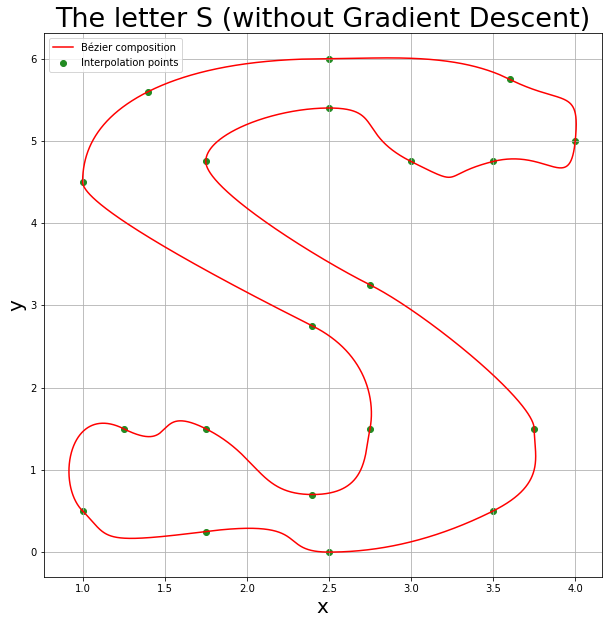

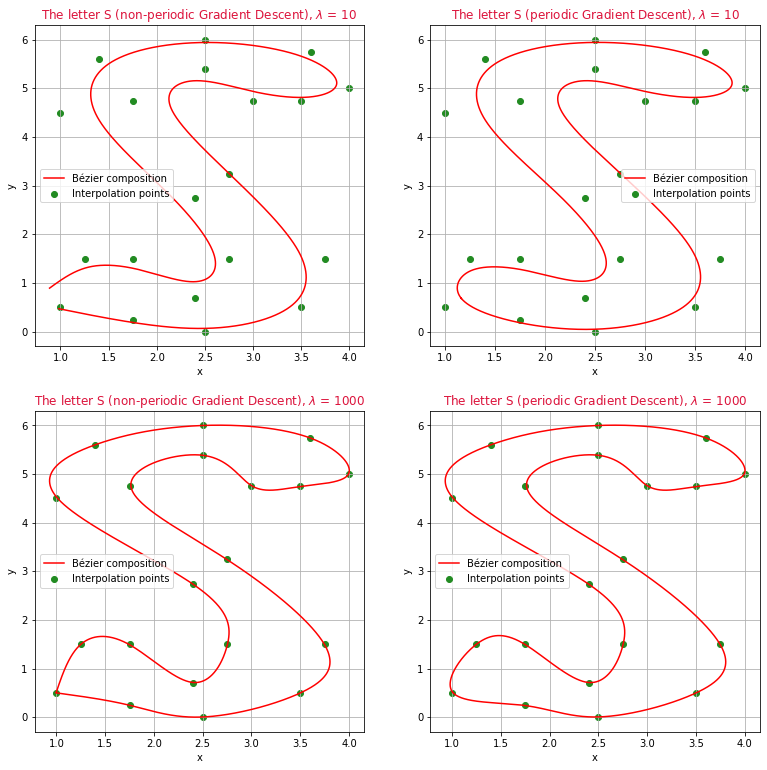

In [81]:
P, t = interpolate_periodic(A, V)
plt.rcParams["figure.figsize"] = (10,10)
draw_bezier_comp(P, A, t, "The letter S (without Gradient Descent)")
fig, ax = plt.subplots(2,2, figsize = (13, 13))

OptimizedBezier_non_periodic(P, A, t, construct_d(A), "The letter S", ax[0,0], lam = 10)
OptimizedBezier_non_periodic(P, A, t, construct_d(A), "The letter S", ax[1,0], lam = 1000)
OptimizedBezier(P, A, t, A.T, "The letter S", ax[0,1], lam = 10)
OptimizedBezier(P, A, t, A.T, "The letter S", ax[1,1], lam = 1000)